# **Formula 1 World Championship Race Performance Analysis and Prediction and Model Deployment**

## **Project Overview**

***Formula One (F1) is one of the most popular and prestigious motorsports in the world. This project aims to analyze and predict the performance of drivers and teams in F1 races using historical data. By leveraging data science techniques, we will extract insights, identify patterns, and develop predictive models to forecast race outcomes. This project will involve extensive data collection, cleaning, exploration, visualization, and machine learning model development.***

***The operation will be done in the project :***

> - Race Performance Analysis
> - Predictive Modeling for Race Outcomes
> - Driver Performance Analysis
> - Team Strategy Analysis
> - Lap Time Analysis
> - Seasonal Trends and Insights
> - Crash and Incident Analysis
> - Fan Engagement Analysis
> - Track Analysis
> - Sponsorship and Financial Analysis

***Dataset List :***

| Dataset Name | Columns Name | Description |
| --- | --- | --- |
| ***circuits.csv*** | circuitId, circuitRef, name, location, country, lat, lng, alt, url | The ***circuits.csv*** file contains detailed information about various Formula One race circuits. |
| ***constructor_results.csv*** | constructorResultsId, raceId, constructorId, points, status | The ***constructor_results.csv*** file contains information about the performance of constructors (teams) in individual Formula One races. |
| ***constructor_standings.csv*** | constructorStandingsId, raceId, constructorId, points, position, positionText, wins | The ***constructor_standings.csv*** file contains the standings of constructors (teams) in the Formula One championship after each race. |
| ***constructors.csv*** | constructorId, constructorRef, name, nationality, url | The ***constructors.csv*** file contains information about the Formula One constructors (teams). |
| ***driver_standings.csv*** | driverStandingsId, raceId, driverId, points, position, positionText, wins | The ***driver_standings.csv*** file contains the standings of Formula One drivers in the championship after each race. |
| ***drivers.csv*** | driverId, driverRef, number, code, forename, surname, dob, nationality, url | The ***drivers.csv*** file contains information about the Formula One drivers. |
| ***lap_times.csv*** | raceId, driverId, lap, position, time, milliseconds | The ***lap_times.csv*** file contains detailed information about the lap times recorded during Formula One races. |
| ***pit_stops.csv*** | raceId, driverId, stop, lap, time, duration, milliseconds | The ***pit_stops.csv*** file contains information about the pit stops made by drivers during Formula One races. |
| ***qualifying.csv*** | qualifyId, raceId, driverId, constructorId, number, position, q1, q2, q3 | The ***qualifying.csv*** file contains information about the qualifying sessions for Formula One races. |
| ***races.csv*** | raceId, year, round, circuitId, name, date, time, url, fp1_date, fp1_time, fp2_date, fp2_time, fp3_date, fp3_time, quali_date, quali_time, sprint_date, sprint_time | The ***races.csv*** file contains detailed information about individual Formula One races for various seasons. |
| ***results.csv*** | resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed, statusId | The ***results.csv*** file contains detailed information about the results of Formula One races. |
| ***seasons.csv*** | year, url | The ***seasons.csv*** file contains information about different Formula One seasons.  |
| ***sprint_results.csv*** | resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, fastestLapTime, statusId | The ***sprint_results.csv*** file contains detailed information about the results of Formula One sprint races. |
| ***status.csv*** | statusId, status | The ***status.csv file*** contains information about the status of drivers in Formula One races. |



## **Loading Dataset**

In [1]:
import pandas as pd 

In [2]:
circuits = pd.read_csv('dataset/circuits.csv')
laptimes = pd.read_csv('dataset/lap_times.csv')
pitstops = pd.read_csv('dataset/pit_stops.csv')
seasons = pd.read_csv('dataset/seasons.csv',parse_dates=['year'])
status = pd.read_csv('dataset/status.csv')

In [3]:
constructor_standings = pd.read_csv('dataset/constructor_standings.csv')
constructors = pd.read_csv('dataset/constructors.csv')
driver_standings = pd.read_csv('dataset/driver_standings.csv')
drivers = pd.read_csv('dataset/drivers.csv')

In [4]:
races = pd.read_csv('dataset/races.csv',parse_dates=['year'])
constructor_results = pd.read_csv('dataset/constructor_results.csv')
results = pd.read_csv('dataset/results.csv')
qualifying = pd.read_csv('dataset/qualifying.csv')

## **Race Performance Analysis**

> Analysis Task:
> - Tracking and Comparing Race's Finishes for Different Drivers
> - Evaluating the Performance of Different Teams Over Time

### **Tracking and Comparing Race's Finishes for Different Drivers**

In [5]:
# Convert necessary columns to numeric, coercing errors to NaN
results['points'] = pd.to_numeric(results['points'], errors='coerce')
results['position'] = pd.to_numeric(results['position'], errors='coerce')

# Remove rows with NaN values in 'points' or 'position'
results.dropna(subset=['points', 'position'], inplace=True)

# Merge results with drivers to get driver names
results_with_drivers = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Merge the above with races to get race details
results_with_races = results_with_drivers.merge(races[['raceId', 'year', 'name']], on='raceId')

# Lambda function to calculate statistics for each driver
calculate_driver_stats = lambda x: pd.Series({
    'total_points': x['points'].sum(),
    'avg_position': x['position'].mean(),
    'races_participated': x['raceId'].nunique()
})

# Group by driver and calculate statistics
driver_stats = results_with_races.groupby(['driverId', 'forename', 'surname']).apply(calculate_driver_stats).reset_index()

# Sort drivers by total points and average position
sorted_driver_stats = driver_stats.sort_values(by=['total_points', 'avg_position'], ascending=[False, True])

# Display top 10 drivers
sorted_driver_stats.head(10)

C:\Users\NAZMUL\AppData\Local\Temp\ipykernel_8984\1063066502.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  driver_stats = results_with_races.groupby(['driverId', 'forename', 'surname']).apply(calculate_driver_stats).reset_index()


driverId   forename     surname  total_points  avg_position  \
0           1      Lewis    Hamilton        4713.5      3.568254   
19         20  Sebastian      Vettel        3098.0      5.282443   
626       830        Max  Verstappen        2744.5      3.526946   
3           4   Fernando      Alonso        2304.0      6.349845   
7           8       Kimi   Räikkönen        1873.0      6.238596   
619       822   Valtteri      Bottas        1788.0      7.425837   
2           3       Nico     Rosberg        1594.5      6.355932   
28         30    Michael  Schumacher        1566.0      3.701245   
612       815     Sergio       Pérez        1552.0      7.925311   
614       817     Daniel   Ricciardo        1319.0      8.613208   

     races_participated  
0                 315.0  
19                262.0  
626               167.0  
3                 323.0  
7                 285.0  
619               209.0  
2                 177.0  
28                241.0  
612               241.0  
614               212.0

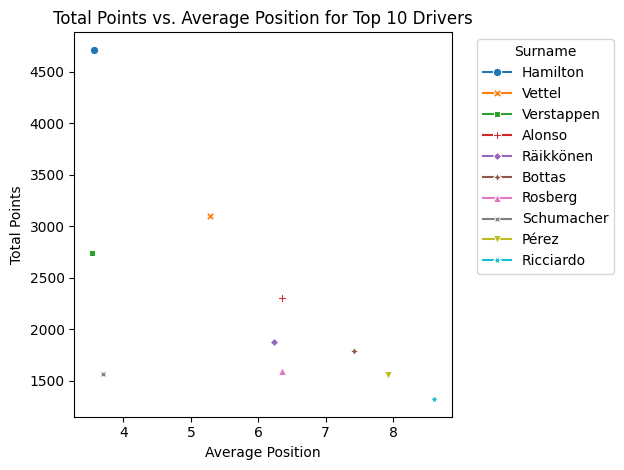

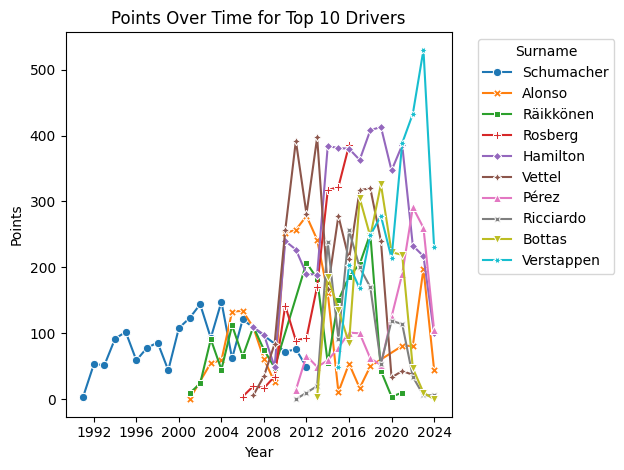

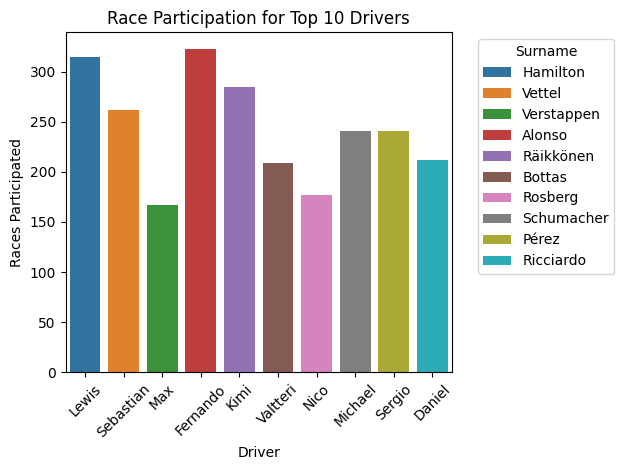

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

top_10_drivers = sorted_driver_stats.head(10)

sns.lineplot(data=top_10_drivers, x='avg_position', y='total_points', hue='surname', style='surname', markers=True, dashes=False)
plt.title('Total Points vs. Average Position for Top 10 Drivers')
plt.xlabel('Average Position')
plt.ylabel('Total Points')
plt.legend(title='Surname', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 2. Points Over Time
points_over_time = results_with_races[results_with_races['driverId'].isin(top_10_drivers['driverId'])]
points_over_time = points_over_time.groupby(['year', 'driverId', 'forename', 'surname'])['points'].sum().reset_index()

sns.lineplot(data=points_over_time, x='year', y='points', hue='surname', style='surname', markers=True, dashes=False)
plt.title('Points Over Time for Top 10 Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Surname', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Race Participation
sns.barplot(data=top_10_drivers, x='forename', y='races_participated', hue='surname', dodge=False)
plt.title('Race Participation for Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Races Participated')
plt.xticks(rotation=45)
plt.legend(title='Surname', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Evaluating the Performance of Different Teams Over Time**

In [7]:
team = constructors.merge(results,on='constructorId',how = 'left')

best = team[['name','points','raceId']]
best = best.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name = 'races')
best = best[best['races'] >= 100]
best.head() 

name  races
0   Ferrari    973
1   McLaren    835
2  Williams    738
3  Red Bull    370
4    Sauber    351

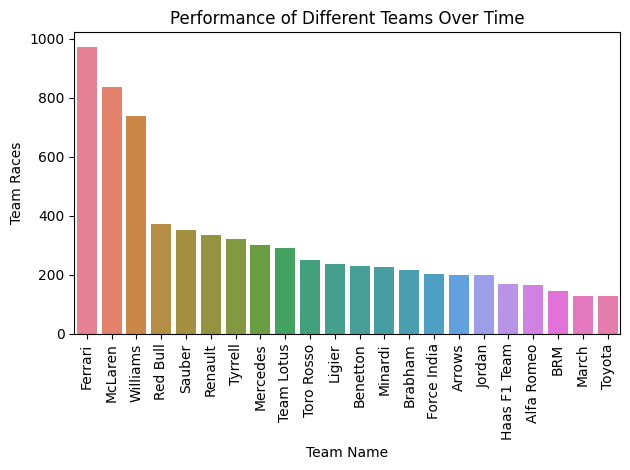

In [8]:
sns.barplot(data=best, x='name', y='races', hue='name', dodge=False)
plt.title("Performance of Different Teams Over Time")
plt.xlabel("Team Name")
plt.ylabel("Team Races")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
historic_points = team.groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)
historic_points

name    points
0      Ferrari  10769.27
1     Mercedes   7499.64
2     Red Bull   7472.00
3      McLaren   6687.50
4     Williams   3628.00
5      Renault   1777.00
6  Force India   1098.00
7   Team Lotus    995.00
8     Benetton    861.50
9      Tyrrell    711.00

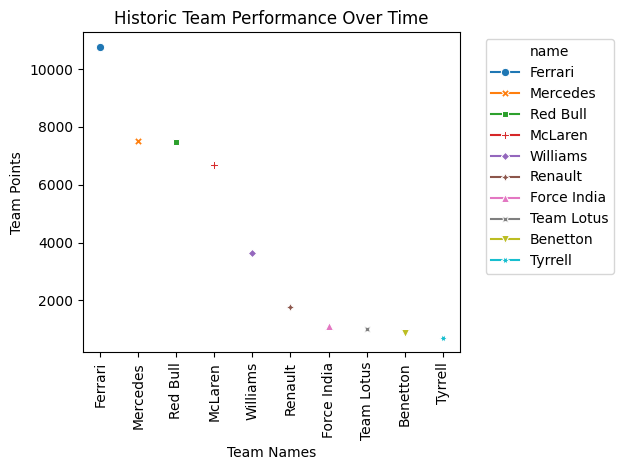

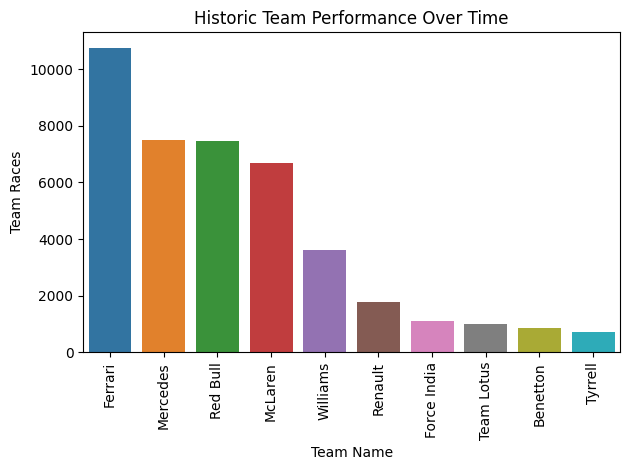

In [10]:
sns.lineplot(x='name', y='points',data=historic_points, hue='name', style='name', markers=True, dashes=False)
plt.xlabel("Team Names")
plt.ylabel("Team Points")
plt.title("Historic Team Performance Over Time")
plt.xticks(rotation=90)
plt.legend(title='name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

sns.barplot(data=historic_points, x='name', y='points', hue='name', dodge=False)
plt.title("Historic Team Performance Over Time")
plt.xlabel("Team Name")
plt.ylabel("Team Races")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
team['position'] = pd.to_numeric(team['position'], errors='coerce')

team_cleaned = team.dropna(subset=['position'])

team_avg_position = team_cleaned.groupby('name').agg({'position': 'mean'}).reset_index()

team_avg_position.columns = ['team_name', 'avg_position']

top_teams_avg_position = team_avg_position.sort_values(by='avg_position').head(10)

top_teams_avg_position

team_name  avg_position
97      Matra-Ford      3.655172
22   Brabham-Repco      3.871795
23           Brawn      4.062500
154        Vanwall      4.185185
73          Lancia      4.333333
36           Deidt      4.333333
41   Eagle-Weslake      4.333333
103       Mercedes      4.341113
84      Lotus-Ford      4.610169
29      Cooper-BRM      4.625000

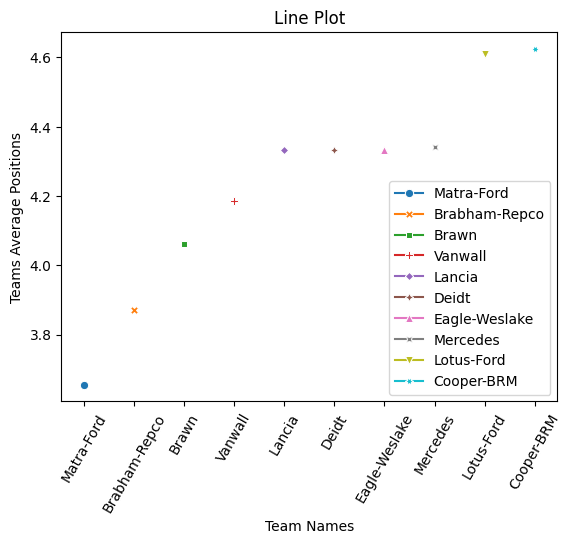

In [12]:
sns.lineplot(x='team_name', y='avg_position', data=top_teams_avg_position, hue='team_name', style='team_name', markers=True, dashes=False)
plt.title('Line Plot')
plt.xlabel('Team Names')
plt.ylabel('Teams Average Positions')
plt.xticks(rotation=60)

plt.legend()
plt.show()

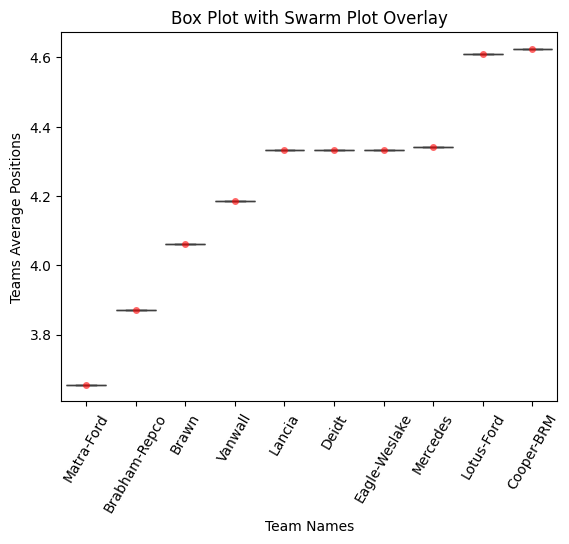

In [13]:
sns.boxplot(x='team_name', y='avg_position', data=top_teams_avg_position)
sns.swarmplot(x='team_name', y='avg_position', data=top_teams_avg_position, color='red', alpha=0.6)
plt.title('Box Plot with Swarm Plot Overlay')
plt.xlabel('Team Names')
plt.ylabel('Teams Average Positions')
plt.xticks(rotation=60)
plt.show()

## **Predictive Modeling for Race Outcomes**

> Analysis Task:
> - Using machine learning models to predict race winners, podium finishes, or overall points.
> - Considering features such as qualifying position, weather conditions, track characteristics, and team performance.
> - Evaluating model performance using metrics such as accuracy, precision, and recall.

### **Using machine learning models to predict race winners, podium finishes, or overall points.**

In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Race Outcome Prediction Model").getOrCreate()

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
results = spark.read.csv("dataset/results.csv", header=True, inferSchema=True)
results = results.withColumnRenamed("position", "final_position")
races = spark.read.csv("dataset/races.csv", header=True, inferSchema=True)
drivers = spark.read.csv("dataset/drivers.csv", header=True, inferSchema=True)
constructors = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)
constructors = constructors.withColumnRenamed("nationality", "constructors_nationality")
qualifying = spark.read.csv("dataset/qualifying.csv", header=True, inferSchema=True)
qualifying = qualifying.withColumnRenamed("position", "qualifying_position")
circuits = spark.read.csv("dataset/circuits.csv", header=True, inferSchema=True)

In [ ]:
results_races = results.join(races, "raceId")
results_races_drivers = results_races.join(drivers, "driverId")
results_races_drivers_constructors = results_races_drivers.join(constructors, "constructorId")
full_data = results_races_drivers_constructors.join(qualifying, ["raceId", "driverId", "constructorId"])
full_data = full_data.join(circuits, "circuitId")


In [ ]:
from pyspark.sql.functions import col 

data = full_data.select(
    col("driverId"),
    col("constructorId"),
    col("final_position").cast("int").alias("label"),
    col("grid"),
    col("positionOrder"),
    col("points"),
    col("laps"),
    col("milliseconds"),
    col("fastestLap"),
    col("fastestLapSpeed"),
    col("q1"),
    col("q2"),
    col("q3"), 
    col("lat"),       
    col("lng"),       
    col("alt")
)

In [ ]:
from pyspark.sql.functions import avg

avg_qualifying_position = full_data.groupBy("driverId", "constructorId").agg(avg("grid").alias("avg_grid"))

data = data.join(avg_qualifying_position, ["driverId", "constructorId"], "left")

past_performance = full_data.groupBy("driverId").agg(avg("points").alias("avg_points"))

data = data.join(past_performance, "driverId", "left")

In [ ]:
from pyspark.sql.functions import to_timestamp

data = data.withColumn("milliseconds", col("milliseconds").cast("double")) \
           .withColumn("fastestLap", col("fastestLap").cast("double")) \
           .withColumn("fastestLapSpeed", col("fastestLapSpeed").cast("double")) \
           .withColumn("q1", col("q1").cast("double")) \
           .withColumn("q2", col("q2").cast("double")) \
           .withColumn("q3", col("q3").cast("double")) 

In [ ]:
mean_avg_grid = data.select('avg_grid').agg({'avg_grid': 'mean'}).collect()[0][0]
mean_avg_points = data.select('avg_points').agg({'avg_points': 'mean'}).collect()[0][0]


data = data.fillna({
    'label': 0,                    
    'grid': 0,
    'positionOrder': 0,
    'points': 0,
    'laps': 0,
    'milliseconds': 0.0,          
    'fastestLap': 0.0,
    'fastestLapSpeed': 0.0,
    'q1': 0.0,
    'q2': 0.0,
    'q3': 0.0,
    'lat': 0.0,
    'lng': 0.0,
    'alt': 0,
    'avg_grid': mean_avg_grid,     
    'avg_points': mean_avg_points  
})

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline 

feature_columns = [col for col in data.columns if col != "label"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

indexer = StringIndexer(inputCol="label", outputCol="label_indexed")

rfc = RandomForestClassifier(featuresCol="features", labelCol="label_indexed")

pipeline = Pipeline(stages=[assembler, indexer, rfc])

model = pipeline.fit(train_data)


### **Considering Features Such as Qualifying Position, Weather Conditions, Track Characteristics, and Team Performance**

In [ ]:
feature_columns = [
    "grid", "positionOrder", "points", "laps", "milliseconds",
    "fastestLap", "fastestLapSpeed", "q1", "q2", "q3",
    "lat", "lng", "alt", "weather_condition", "avg_grid", "avg_points"
]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")


### **Evaluating Model Performance Using Metrics Such as Accuracy, Precision, and Recall**

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test_data)


evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy on test data: {accuracy}")


precision_evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print(f"Precision on test data: {precision}")

recall_evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print(f"Recall on test data: {recall}")

f1_evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score on test data: {f1_score}")

Accuracy on test data: 0.823065549531789
Precision on test data: 0.8308925735964123
Recall on test data: 0.8230655495317889
F1 Score on test data: 0.8087743963306502


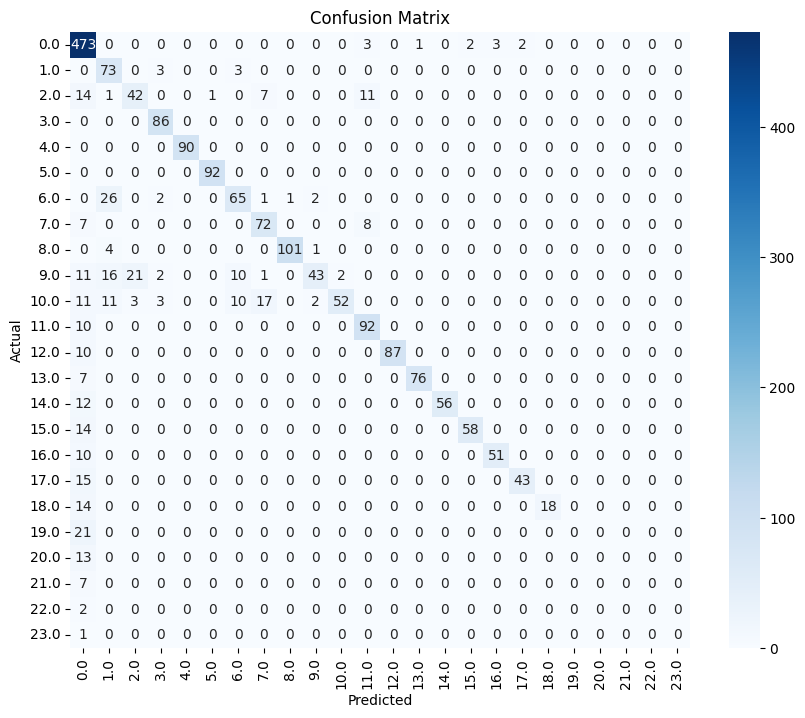

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

actual = predictions.select("label_indexed").toPandas()
predicted = predictions.select("prediction").toPandas()

cm = confusion_matrix(actual, predicted)
cm_df = pd.DataFrame(cm, index=np.unique(actual), columns=np.unique(actual))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


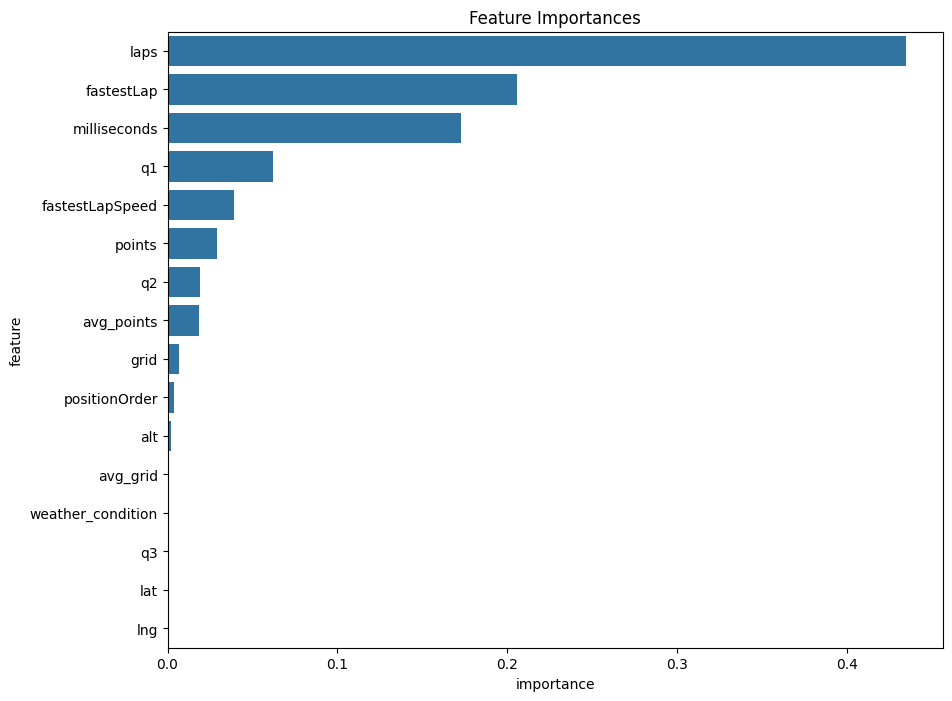

In [ ]:
rf_model = model.stages[-1]
importances = rf_model.featureImportances

feature_importance_df = pd.DataFrame(list(zip(feature_columns, importances)), columns=["feature", "importance"]).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="importance", y="feature", data=feature_importance_df)
plt.title("Feature Importances")
plt.show()


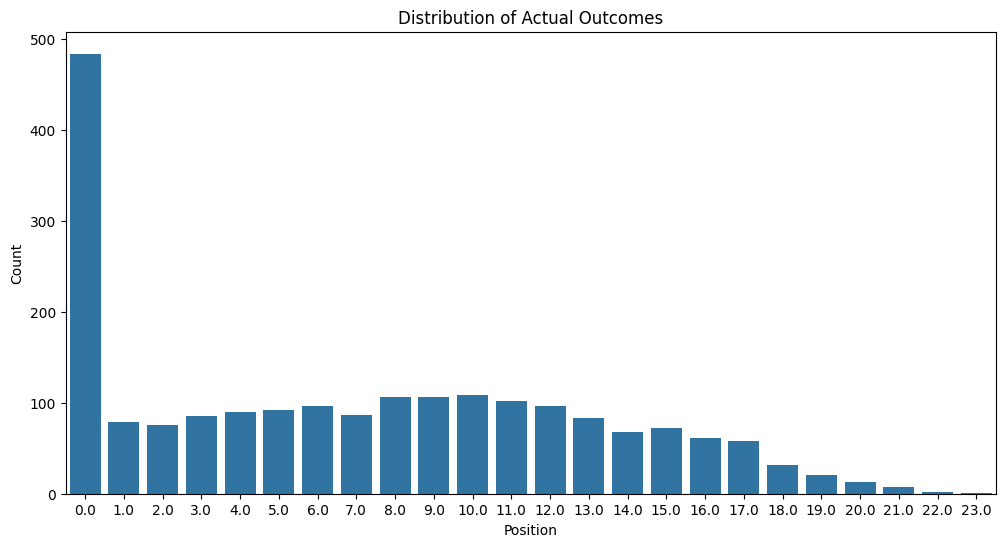

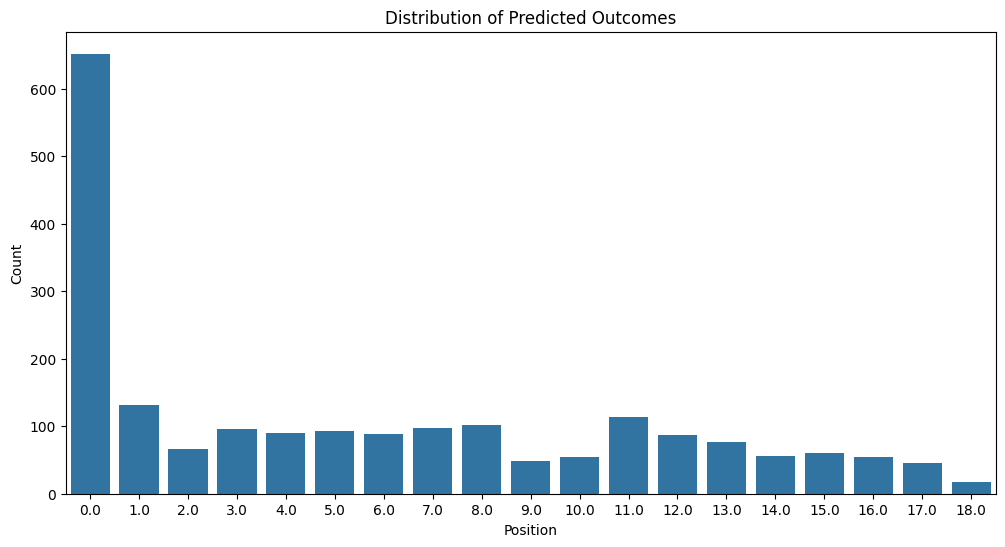

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="label_indexed", data=actual)
plt.title("Distribution of Actual Outcomes")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x="prediction", data=predicted)
plt.title("Distribution of Predicted Outcomes")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()


Additional Visualizations for Comparing Raw Data and Predicted Data

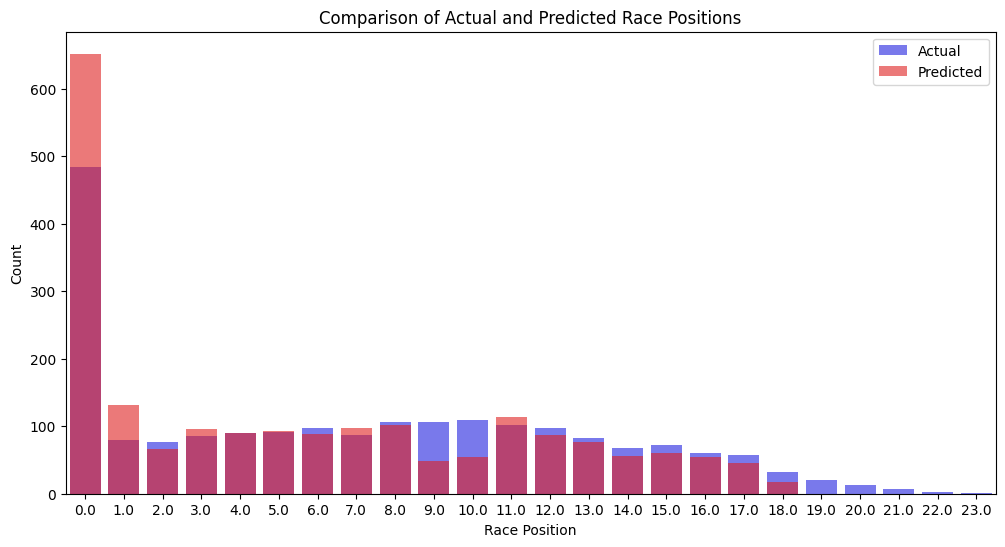

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

actual_vs_predicted = predictions.select("label_indexed", "prediction").toPandas()
actual_vs_predicted.columns = ["Actual Position", "Predicted Position"]

plt.figure(figsize=(12, 6))
sns.countplot(x="Actual Position", data=actual_vs_predicted, color='blue', label='Actual', alpha=0.6)
sns.countplot(x="Predicted Position", data=actual_vs_predicted, color='red', label='Predicted', alpha=0.6)
plt.title("Comparison of Actual and Predicted Race Positions")
plt.xlabel("Race Position")
plt.ylabel("Count")
plt.legend()
plt.show()


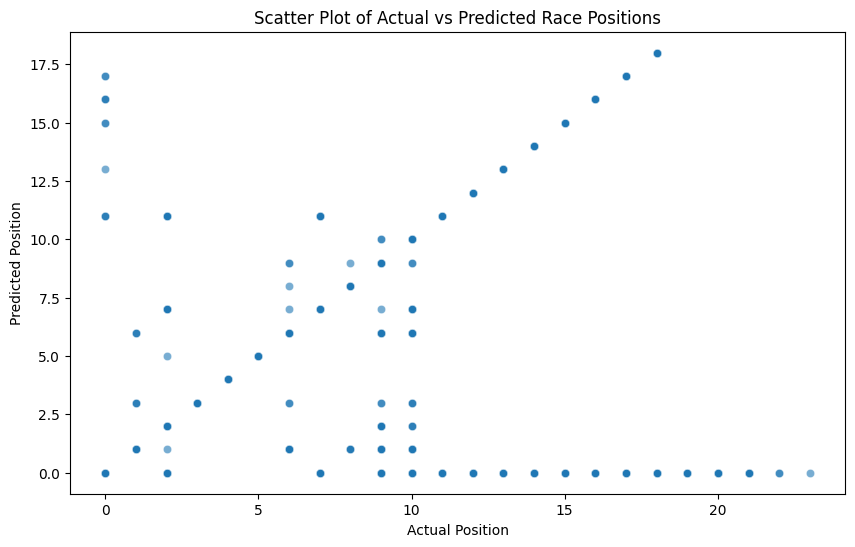

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Actual Position", y="Predicted Position", data=actual_vs_predicted, alpha=0.6)
plt.title("Scatter Plot of Actual vs Predicted Race Positions")
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.show()

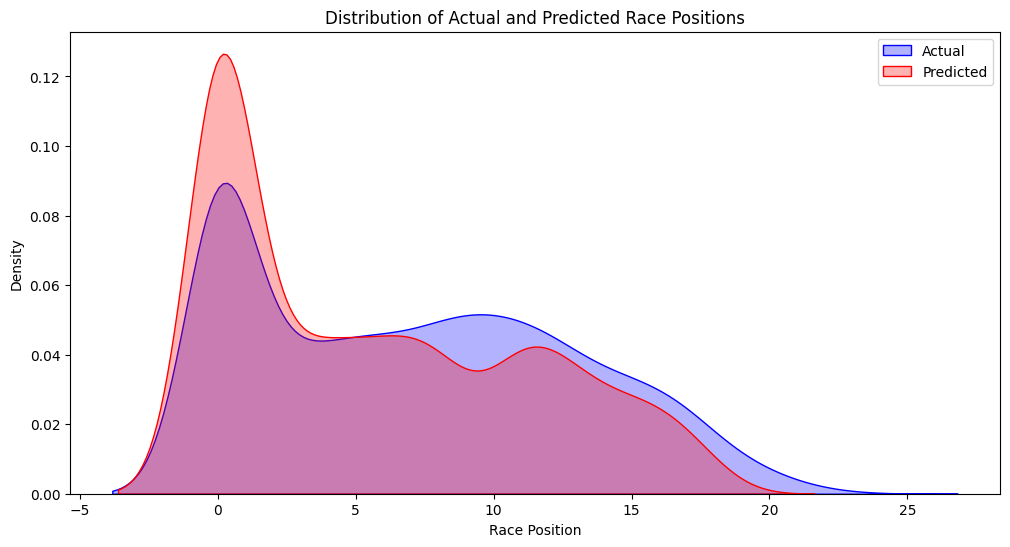

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(actual_vs_predicted["Actual Position"], color='blue', label='Actual', fill=True, alpha=0.3)
sns.kdeplot(actual_vs_predicted["Predicted Position"], color='red', label='Predicted', fill=True, alpha=0.3)
plt.title("Distribution of Actual and Predicted Race Positions")
plt.xlabel("Race Position")
plt.ylabel("Density")
plt.legend()
plt.show()


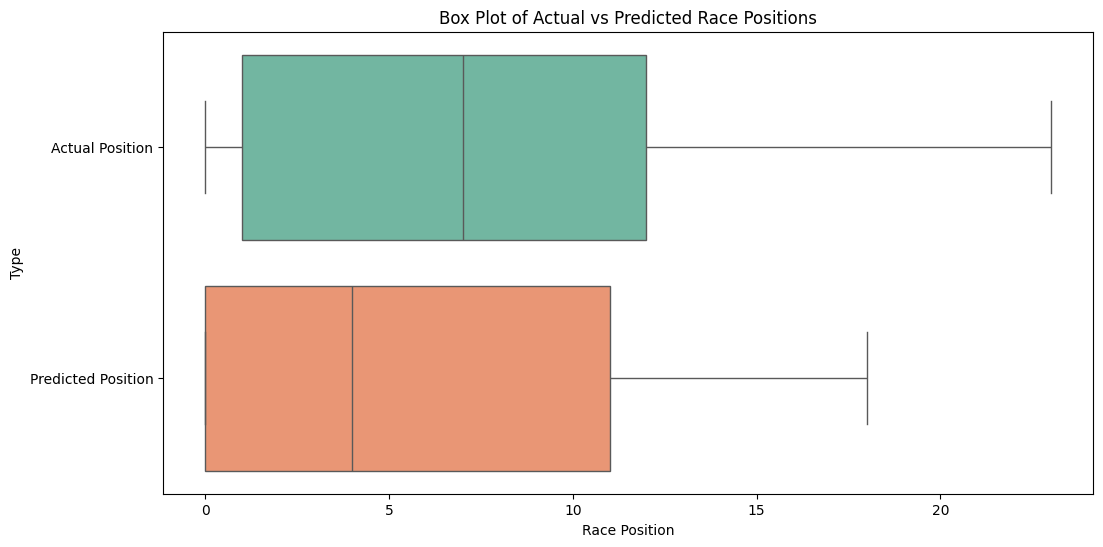

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=actual_vs_predicted, orient="h", palette="Set2")
plt.title("Box Plot of Actual vs Predicted Race Positions")
plt.xlabel("Race Position")
plt.ylabel("Type")
plt.show()


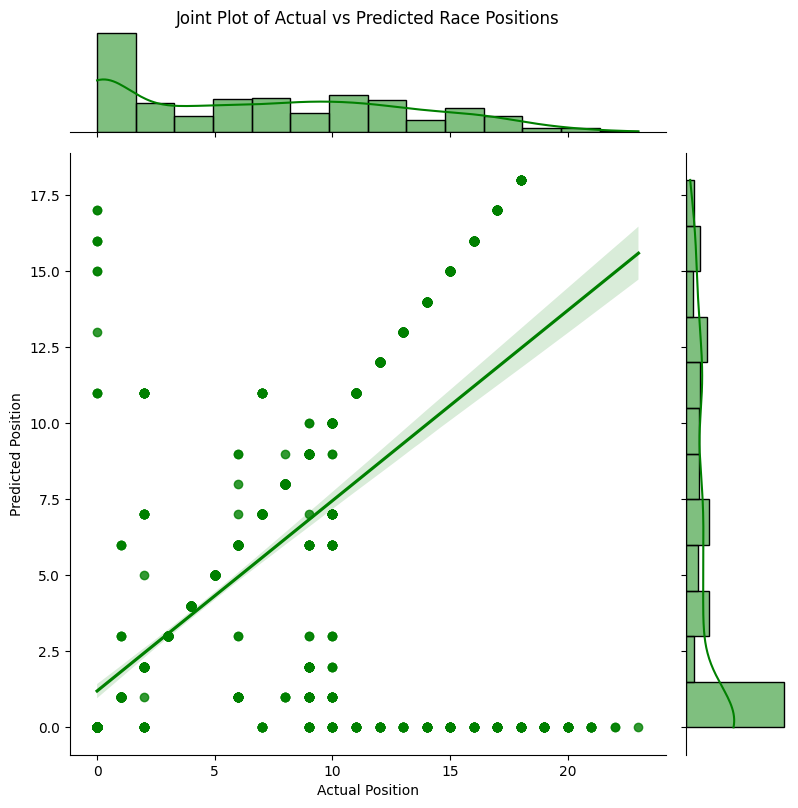

In [ ]:
sns.jointplot(x="Actual Position", y="Predicted Position", data=actual_vs_predicted, kind="reg", height=8, ratio=5, color="g")
plt.title("Joint Plot of Actual vs Predicted Race Positions", y=1.2)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.show()


In [ ]:
results = spark.read.csv("dataset/results.csv", header=True, inferSchema=True)
drivers = spark.read.csv("dataset/drivers.csv", header=True, inferSchema=True)
constructors = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)

results = results.join(drivers, results.driverId == drivers.driverId, 'inner').drop(drivers.driverId)
results = results.join(constructors, results.constructorId == constructors.constructorId, 'inner').drop(constructors.constructorId)

results = results.select("raceId", "name", "forename", "surname", "points", "position", "constructorRef")


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

results = results.withColumn("position", col("position").cast("int"))

results = results.fillna({
    'raceId': 0,
    'name': "Unknown",
    'forename': "Unknown",
    'surname': "Unknown",
    'points': 0,
    'position': 0,
    'constructorRef': "Unknown"
})

string_indexer = StringIndexer(
    inputCols=["name", "forename", "surname", "constructorRef"],
    outputCols=["name_indexed", "forename_indexed", "surname_indexed", "constructorRef_indexed"],
    handleInvalid="keep"
)

assembler = VectorAssembler(inputCols=["name_indexed", "forename_indexed", "surname_indexed", "constructorRef_indexed"],
                            outputCol="features")

rf = RandomForestRegressor(featuresCol="features", labelCol="position", maxBins=1000)

pipeline = Pipeline(stages=[string_indexer, assembler, rf])

train_data, test_data = results.randomSplit([0.8, 0.2])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

predictions.select("name", "forename", "surname", "constructorRef", "position", "prediction").show()


+-----------+---------+-----------+--------------+--------+------------------+
|       name| forename|    surname|constructorRef|position|        prediction|
+-----------+---------+-----------+--------------+--------+------------------+
|   Red Bull|Sebastian|     Vettel|      red_bull|      13|  3.71128152504007|
|    Renault|   Nelson| Piquet Jr.|       renault|       0|6.1213039010160575|
|   Williams|   Kazuki|   Nakajima|      williams|       0|10.451981485249897|
|   Red Bull|Sebastian|     Vettel|      red_bull|      15|  3.71128152504007|
| Toro Rosso|Sébastien|   Bourdais|    toro_rosso|      10| 9.574805798863403|
|    Ferrari|   Felipe|      Massa|       ferrari|       0| 5.580404289322358|
|     Toyota|    Jarno|     Trulli|        toyota|       0| 6.453235429676451|
|     Toyota|     Timo|      Glock|        toyota|       7| 7.340483249004066|
| BMW Sauber|     Nick|   Heidfeld|    bmw_sauber|      19| 6.428245017564178|
|   Red Bull|     Mark|     Webber|      red_bull|  

In [ ]:
predictions_to_save = predictions.select("name", "forename", "surname", "constructorRef", "position", "prediction")

predictions_to_save_no_position = predictions_to_save.drop("position")
pandas_df = predictions_to_save_no_position.toPandas()

output_path = "output/future_race.csv"

pandas_df.to_csv(output_path, index=False)

In [ ]:
future_races = spark.read.csv("output/future_race.csv", header=True, inferSchema=True)

if 'prediction' in future_races.columns:
    future_races = future_races.drop('prediction')

future_predictions = model.transform(future_races)

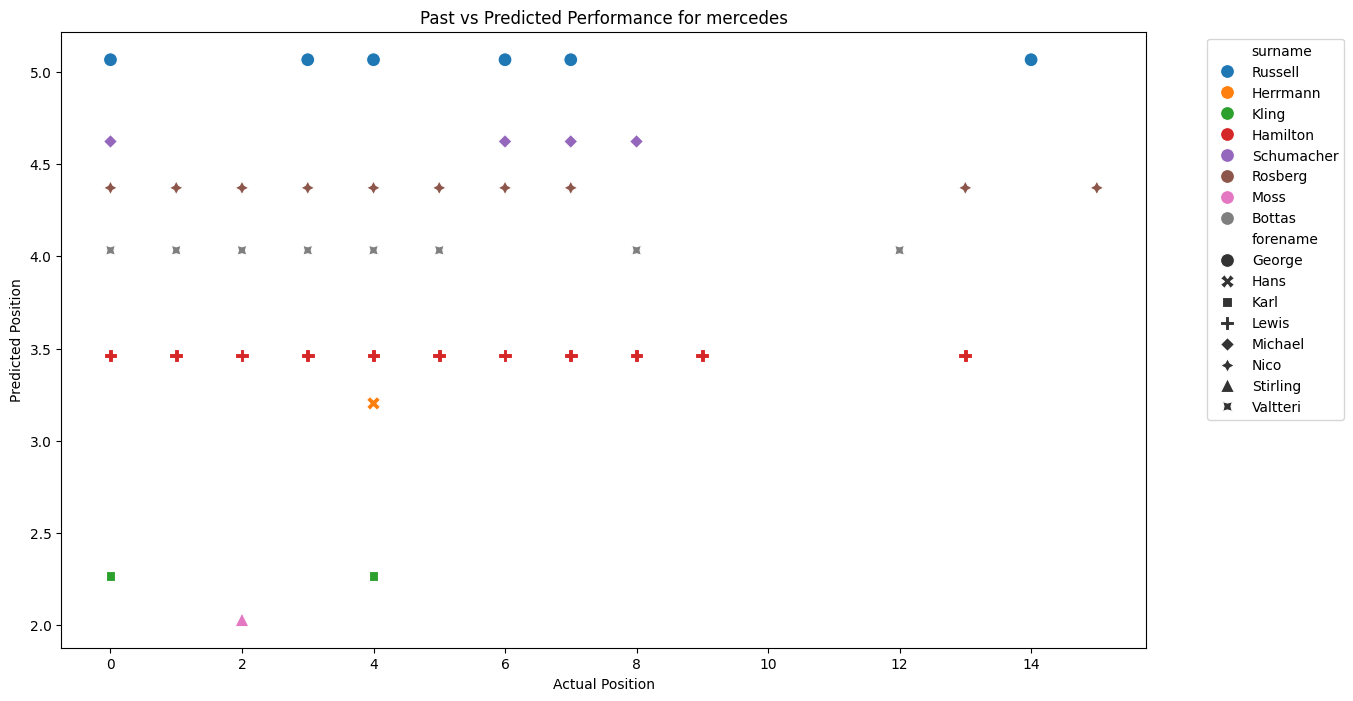

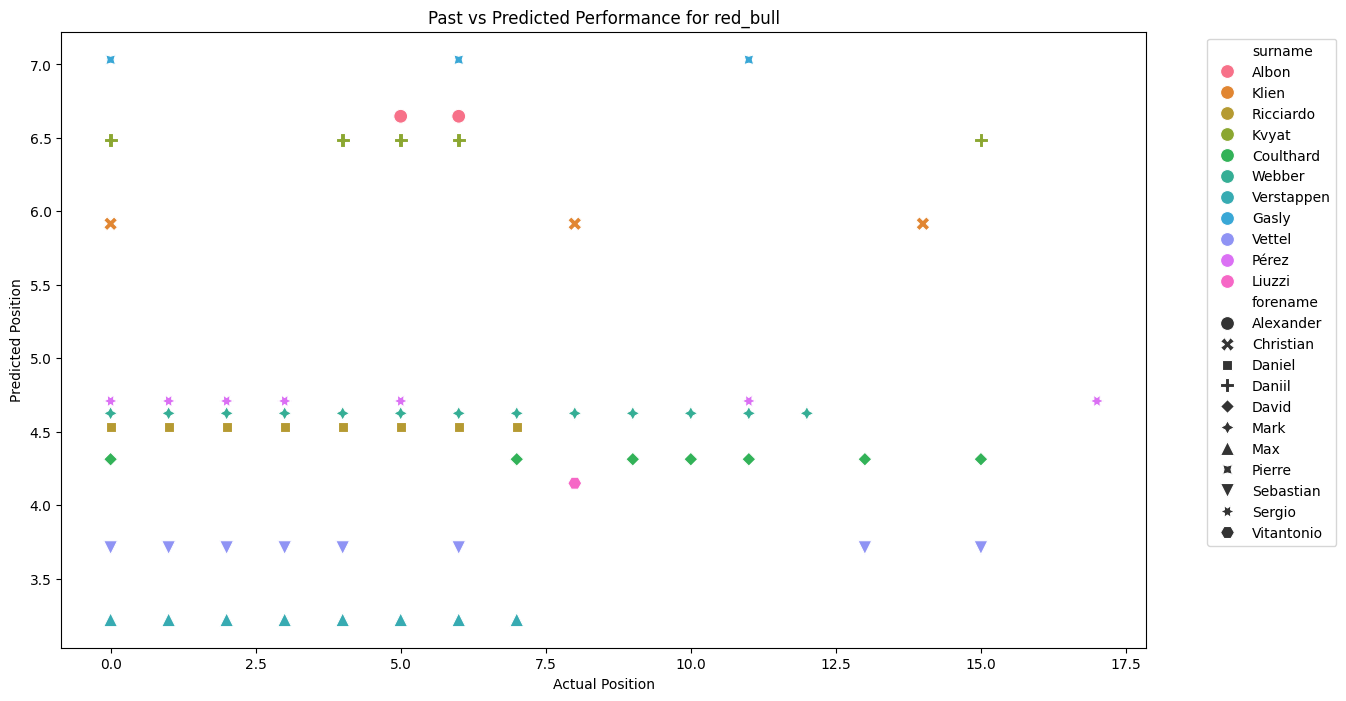

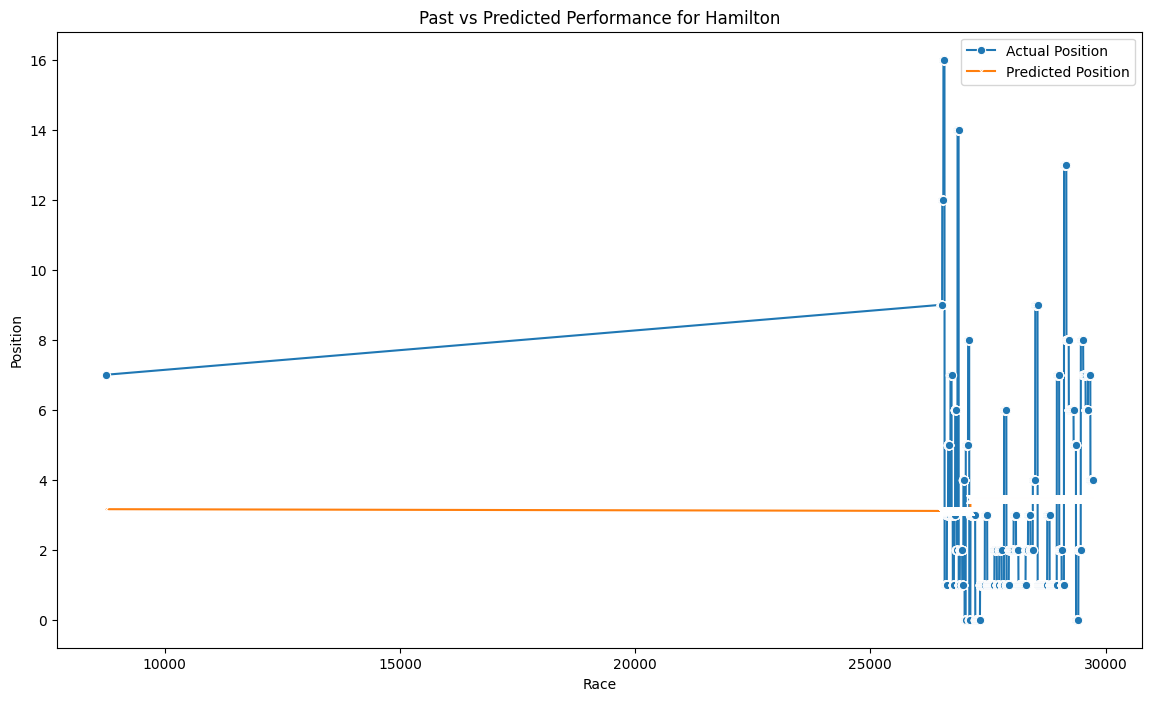

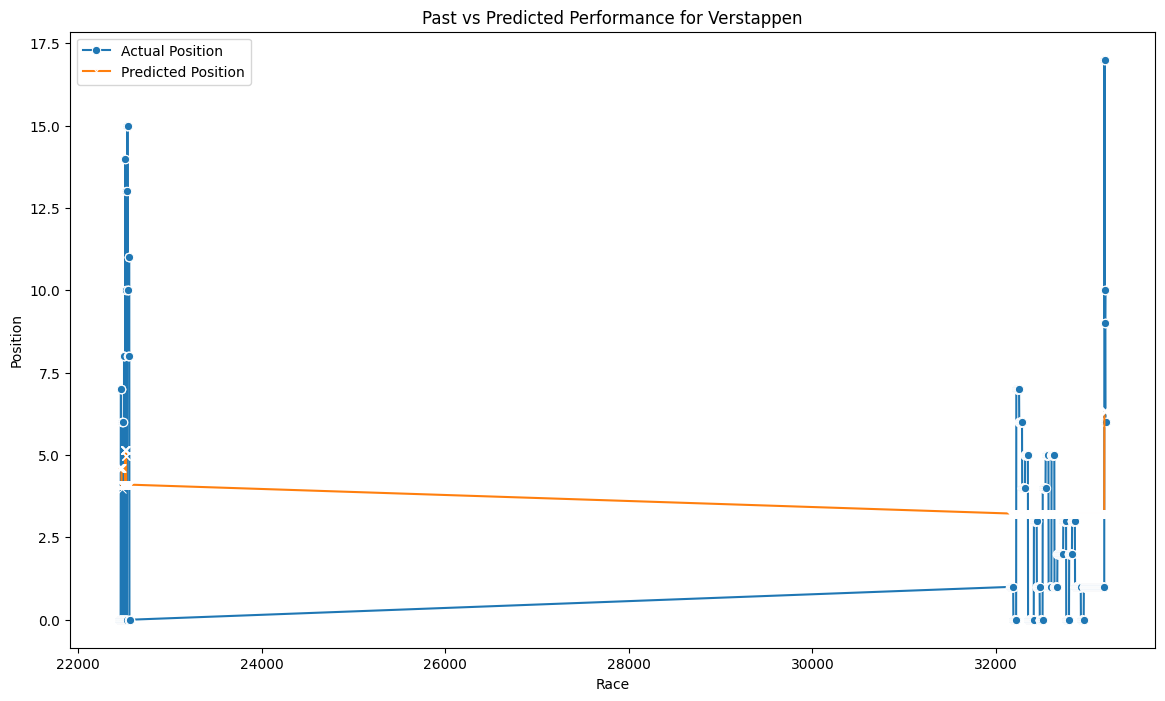

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

past_performance = predictions.select("forename", "surname", "constructorRef", "position").toPandas()
future_performance = future_predictions.select("forename", "surname", "constructorRef", "prediction").toPandas()

future_performance.columns = ["forename", "surname", "constructorRef", "predicted_position"]

performance_comparison = pd.merge(past_performance, future_performance, on=["forename", "surname", "constructorRef"], how="outer")

team_name = "mercedes"  

team_data = performance_comparison[performance_comparison["constructorRef"] == team_name]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=team_data, x="position", y="predicted_position", hue="surname", style="forename", s=100)
plt.title(f"Past vs Predicted Performance for {team_name}")
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

team_name = "red_bull"  

team_data = performance_comparison[performance_comparison["constructorRef"] == team_name]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=team_data, x="position", y="predicted_position", hue="surname", style="forename", s=100)
plt.title(f"Past vs Predicted Performance for {team_name}")
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

driver_name = "Hamilton" 

driver_data = performance_comparison[performance_comparison["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_data, x=driver_data.index, y="position", label="Actual Position", marker='o')
sns.lineplot(data=driver_data, x=driver_data.index, y="predicted_position", label="Predicted Position", marker='x')
plt.title(f"Past vs Predicted Performance for {driver_name}")
plt.xlabel("Race")
plt.ylabel("Position")
plt.legend()
plt.show()

driver_name = "Verstappen"  

driver_data = performance_comparison[performance_comparison["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_data, x=driver_data.index, y="position", label="Actual Position", marker='o')
sns.lineplot(data=driver_data, x=driver_data.index, y="predicted_position", label="Predicted Position", marker='x')
plt.title(f"Past vs Predicted Performance for {driver_name}")
plt.xlabel("Race")
plt.ylabel("Position")
plt.legend()
plt.show()


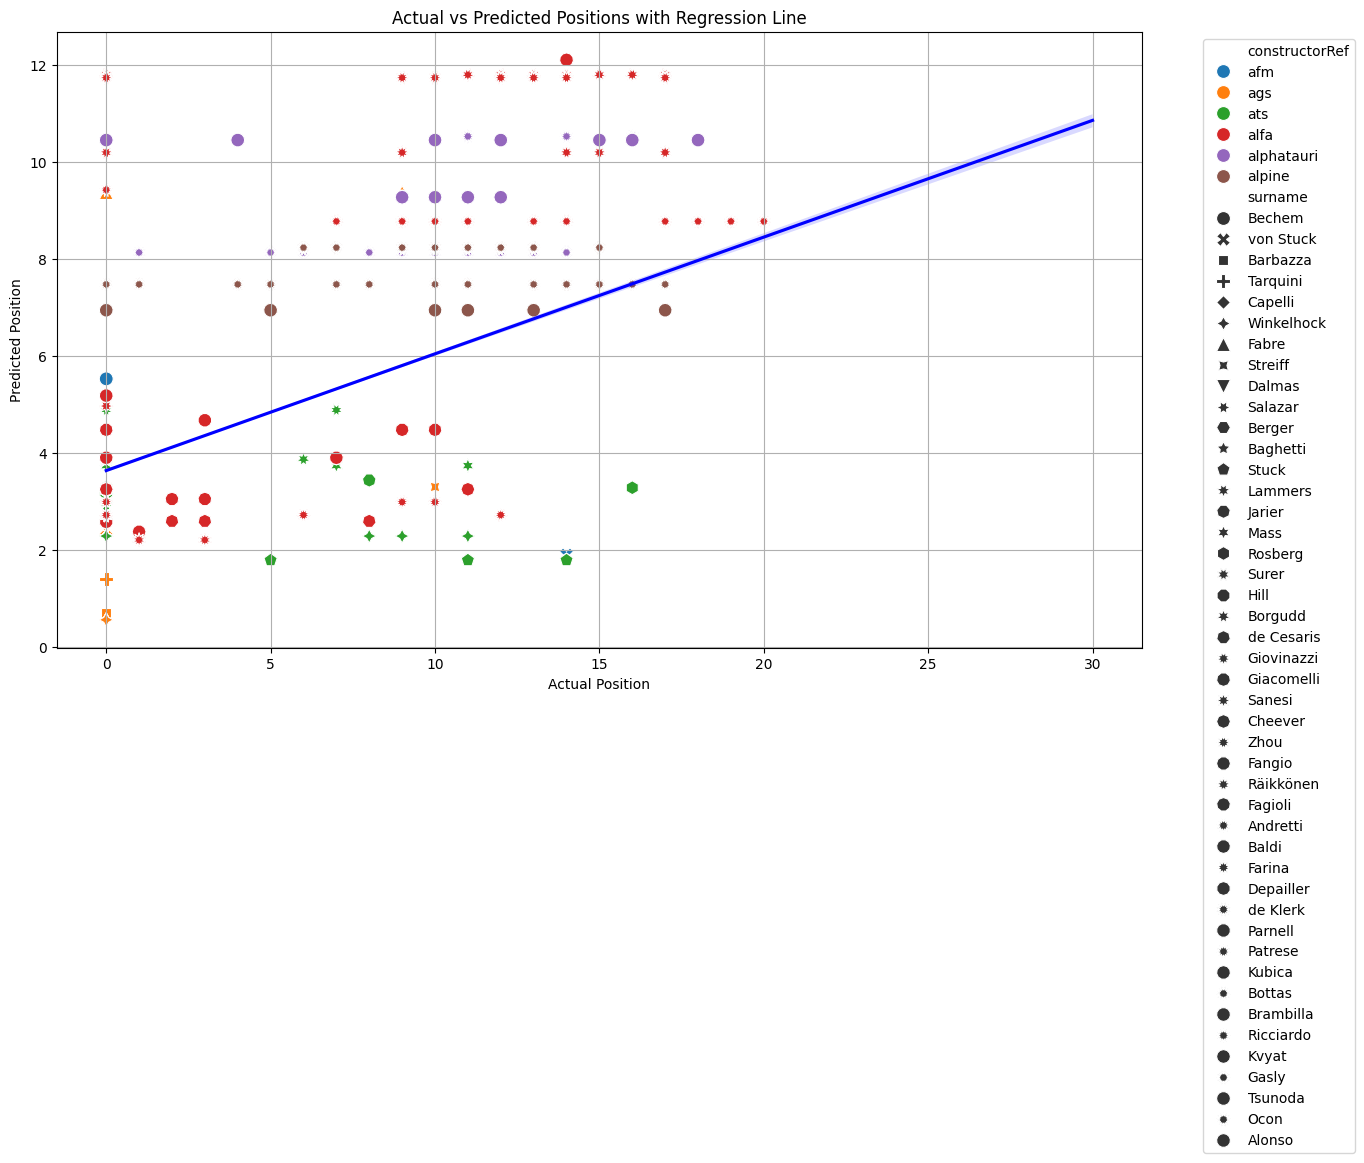

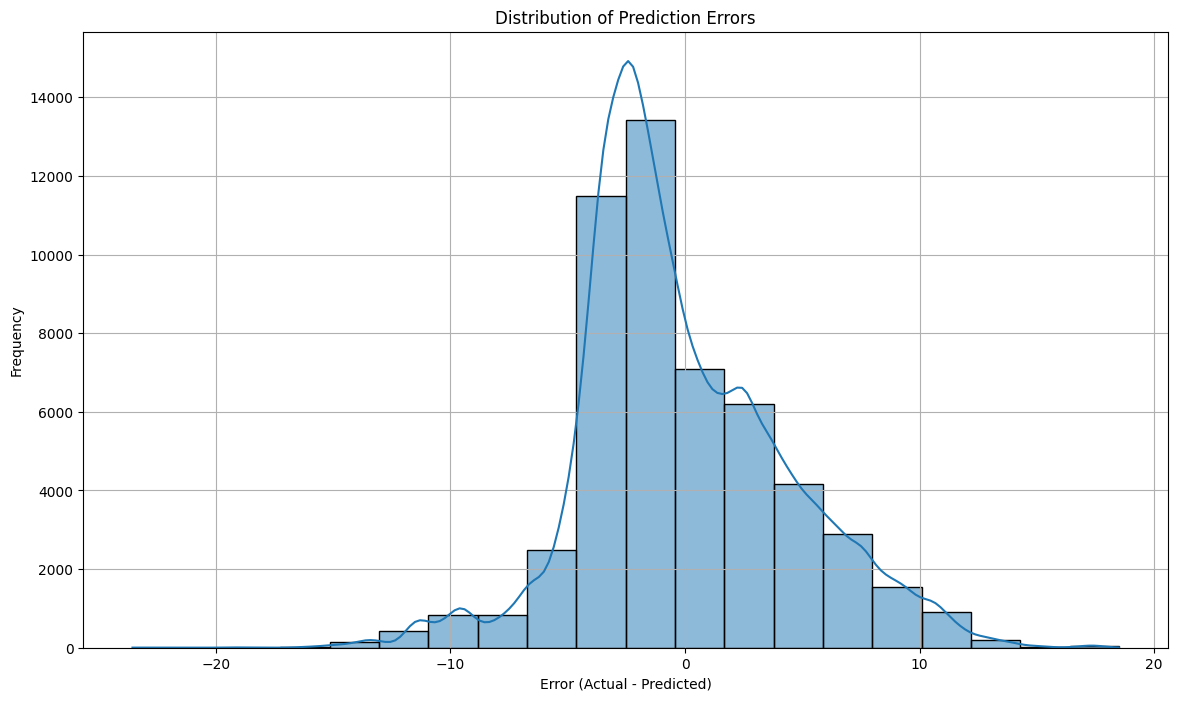

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

past_performance = predictions.select("name", "forename", "surname", "constructorRef", "position").toPandas()
future_performance = future_predictions.select("name", "forename", "surname", "constructorRef", "prediction").toPandas()

future_performance.columns = ["name", "forename", "surname", "constructorRef", "predicted_position"]

performance_comparison = pd.merge(past_performance, future_performance, on=["name", "forename", "surname", "constructorRef"], how="outer")
performance_comparison['error'] = performance_comparison['position'] - performance_comparison['predicted_position']

plt.figure(figsize=(14, 8))
sns.scatterplot(data=performance_comparison.head(2000), x="position", y="predicted_position", hue="constructorRef", style="surname", s=100)
sns.regplot(data=performance_comparison, x="position", y="predicted_position", scatter=False, color='blue')
plt.title("Actual vs Predicted Positions with Regression Line")
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(performance_comparison["error"], bins=20, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## **Driver Performance Analysis**

> - Analyzing key performance metrics like average lap times, fastest laps, and race wins
> - Visualizing driver performance trends and compare them with peers
> - Examining the impact of team changes or car upgrades on driver performance 

### **Analyzing key performance metrics like average lap times, fastest laps, and race wins**

In [ ]:
lap_times = spark.read.csv("dataset/lap_times.csv", header=True, inferSchema=True)

lap_times = lap_times.join(drivers, lap_times.driverId == drivers.driverId, 'inner').drop(drivers.driverId)

avg_lap_times = lap_times.groupBy("forename", "surname").agg({"milliseconds": "avg"}).withColumnRenamed("avg(milliseconds)", "avg_lap_time")

avg_lap_times.show()

+--------+----------+------------------+
|forename|   surname|      avg_lap_time|
+--------+----------+------------------+
|  Daniil|     Kvyat| 98504.52487135505|
|    Jean|     Alesi|  92439.6363449692|
|   Kamui| Kobayashi|105235.57042451504|
|    Ukyo|  Katayama| 95495.80431309904|
|  Gianni|Morbidelli| 89921.91267605634|
|     Rio|  Haryanto| 94688.58592471358|
|   David| Coulthard|  89663.8107216127|
|  Heikki|Kovalainen|100620.95779601407|
|  Felipe|      Nasr|101964.85836330935|
|   Pedro|      Lamy| 98066.79566563468|
|  Pastor| Maldonado|103471.58930552474|
|   Pedro|de la Rosa| 97307.13216736772|
|    Nick|  Heidfeld| 92514.57860014432|
|  Sergio|     Pérez|  98108.7903302046|
|    Mark|    Webber| 95273.10872324991|
|     Jan| Magnussen| 93542.74881516588|
|  Daniel| Ricciardo| 98350.59697035904|
|  Romain|  Grosjean| 97769.06713381555|
|   Lewis|  Hamilton|  96838.8730280288|
|   André|  Lotterer|          129985.0|
+--------+----------+------------------+
only showing top

In [ ]:
results = spark.read.csv("dataset/results.csv", header=True, inferSchema=True)

results_with_drivers = results.join(drivers, results.driverId == drivers.driverId, 'inner').drop(drivers.driverId)

fastest_laps = results_with_drivers.groupBy("forename", "surname").agg({"fastestLap": "count"}).withColumnRenamed("count(fastestLap)", "fastest_laps")

race_wins = results_with_drivers.filter(results_with_drivers.position == 1).groupBy("forename", "surname").count().withColumnRenamed("count", "race_wins")


fastest_laps.show()
race_wins.show()


+----------+-------------+------------+
|  forename|      surname|fastest_laps|
+----------+-------------+------------+
|     Peter|       Gethin|          30|
|     Nasif|     Estéfano|           5|
|      Mike|       Taylor|           2|
|     Jimmy|      Jackson|           2|
|Christijan|       Albers|          46|
|    Harald|         Ertl|          29|
|    Hubert|        Hahne|           3|
|      Bill|     Vukovich|           5|
|    Daniil|        Kvyat|         112|
|     Scott|        Speed|          28|
|     Fritz|       d'Orey|           3|
|      Yves|    Cabantous|          13|
|      Jean|        Alesi|         202|
|  Philippe|       Alliot|         115|
|Alessandro|Pesenti-Rossi|           4|
|    Jackie|        Lewis|          11|
|     Geoff|         Duke|           1|
|      Elio|   de Angelis|         110|
|      John|    Nicholson|           2|
|   Günther|     Seiffert|           2|
+----------+-------------+------------+
only showing top 20 rows

+------------+

### **Visualize Driver Performance Trends and Compare with Peers**

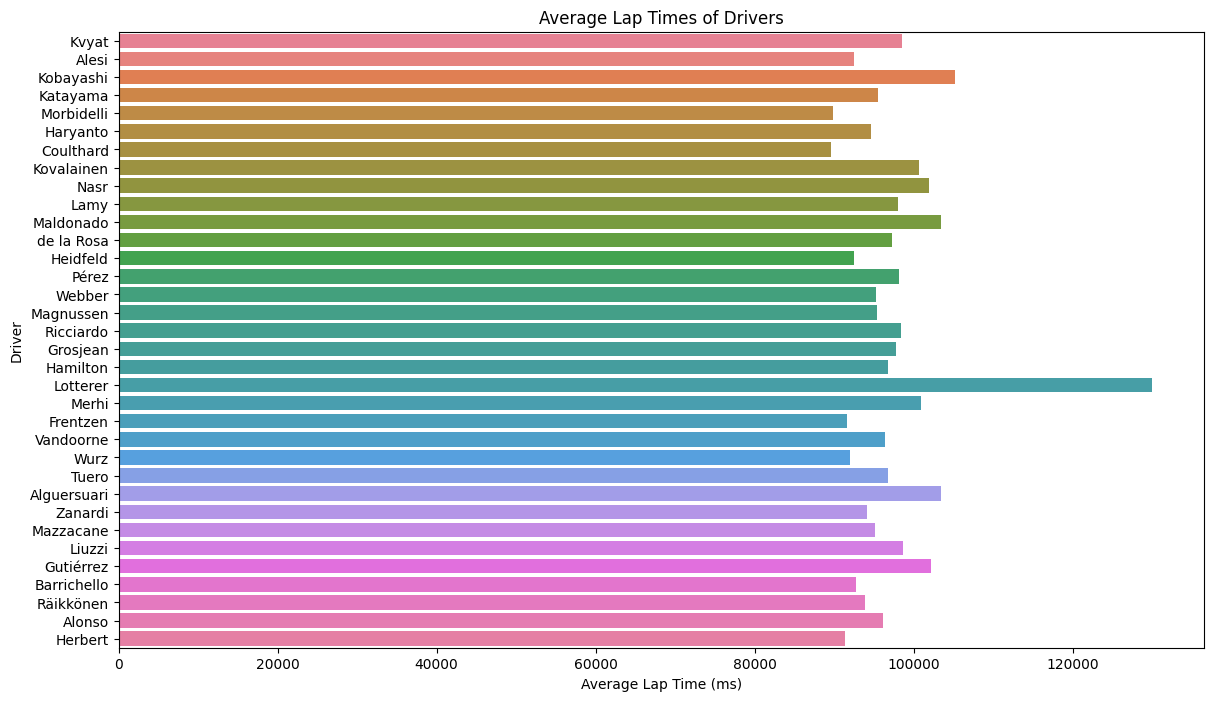

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_lap_times_pd = avg_lap_times.toPandas()
avg_lap_times_pd = avg_lap_times_pd.head(35)

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_lap_times_pd, x="avg_lap_time", y="surname", errorbar=None, hue="surname", legend=False)
plt.title("Average Lap Times of Drivers")
plt.xlabel("Average Lap Time (ms)")
plt.ylabel("Driver")
plt.show()


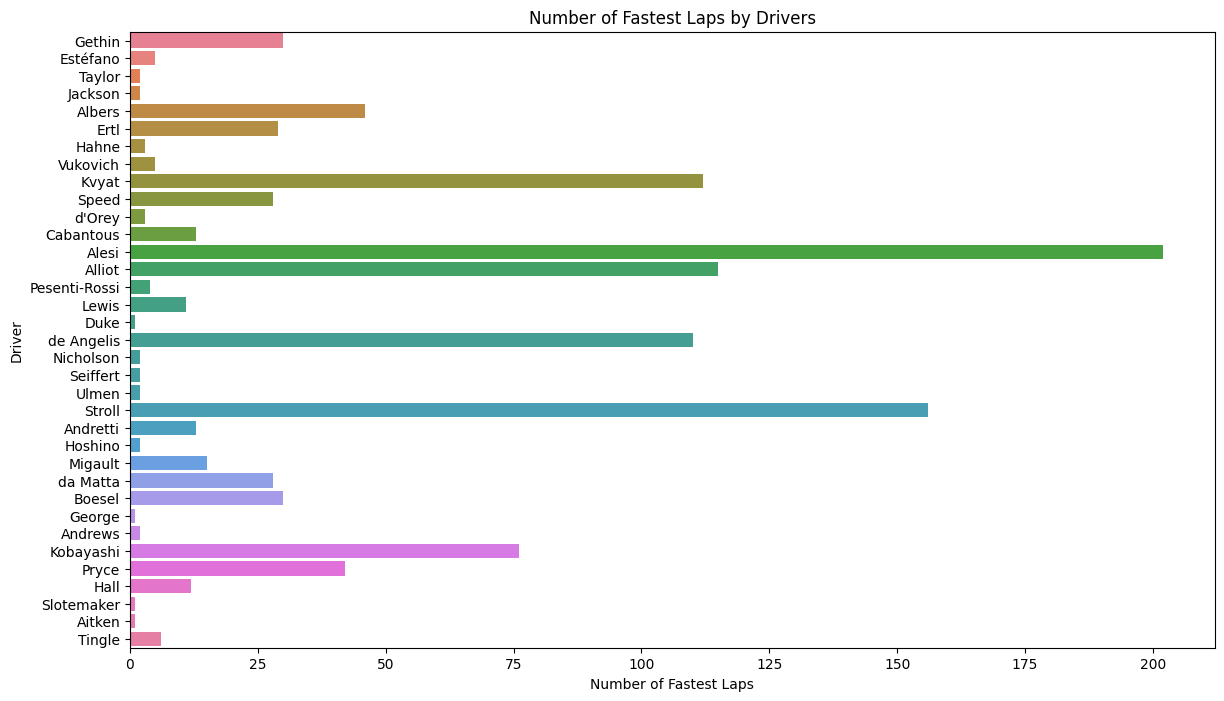

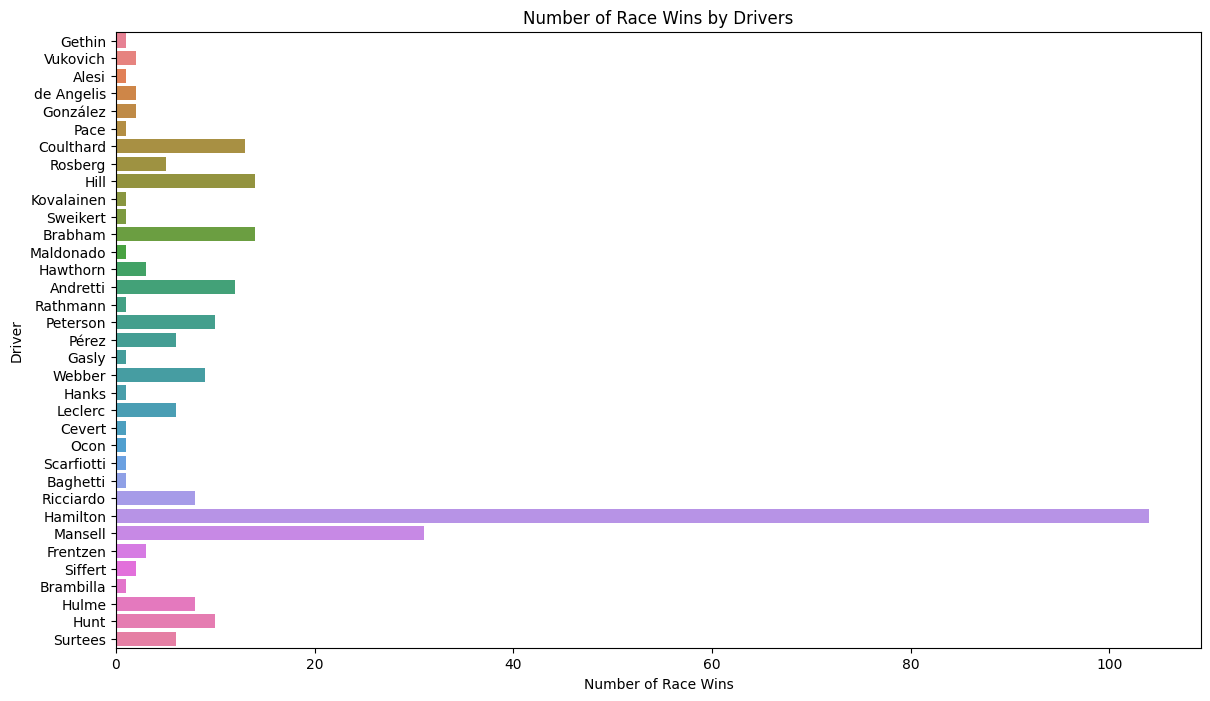

In [ ]:
fastest_laps_pd = fastest_laps.toPandas()
fastest_laps_pd = fastest_laps_pd.head(35)
race_wins_pd = race_wins.toPandas()
race_wins_pd = race_wins_pd.head(35)

plt.figure(figsize=(14, 8))
sns.barplot(data=fastest_laps_pd, x="fastest_laps", y="surname", errorbar=None, hue="surname", legend=False)
plt.title("Number of Fastest Laps by Drivers")
plt.xlabel("Number of Fastest Laps")
plt.ylabel("Driver")
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=race_wins_pd, x="race_wins", y="surname", errorbar=None, hue="surname", legend=False)
plt.title("Number of Race Wins by Drivers")
plt.xlabel("Number of Race Wins")
plt.ylabel("Driver")
plt.show()


### **Examine the Impact of Team Changes or Car Upgrades on Driver Performance**

In [ ]:
constructors = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)

results_with_constructors = results_with_drivers.join(constructors, results_with_drivers.constructorId == constructors.constructorId, 'inner').drop(constructors.constructorId)

driver_team_changes = results_with_constructors.groupBy("forename", "surname", "constructorRef").agg({"points": "avg"}).withColumnRenamed("avg(points)", "avg_points")

driver_team_changes.show(100)


+------------+--------------+------------------+--------------------+
|    forename|       surname|    constructorRef|          avg_points|
+------------+--------------+------------------+--------------------+
|        Alex|         Yoong|           minardi|                 0.0|
|     Michael|    Schumacher|          benetton|   4.455882352941177|
|        Éric|       Bernard|            ligier|  0.3076923076923077|
|      Gregor|        Foitek|          eurobrun|                 0.0|
|      Jochen|          Mass|               ats|                 0.0|
|       Larry|       Perkins|brabham-alfa_romeo|                 0.0|
|       Nanni|         Galli|      iso_marlboro|                 0.0|
|         Ken|      Kavanagh|          maserati|                 0.0|
|         Joe|         Kelly|              alta|                 0.0|
|         Jos|    Verstappen|           tyrrell|                 0.0|
|        Hans|         Heyer|            penske|                 0.0|
|        Clay|     R

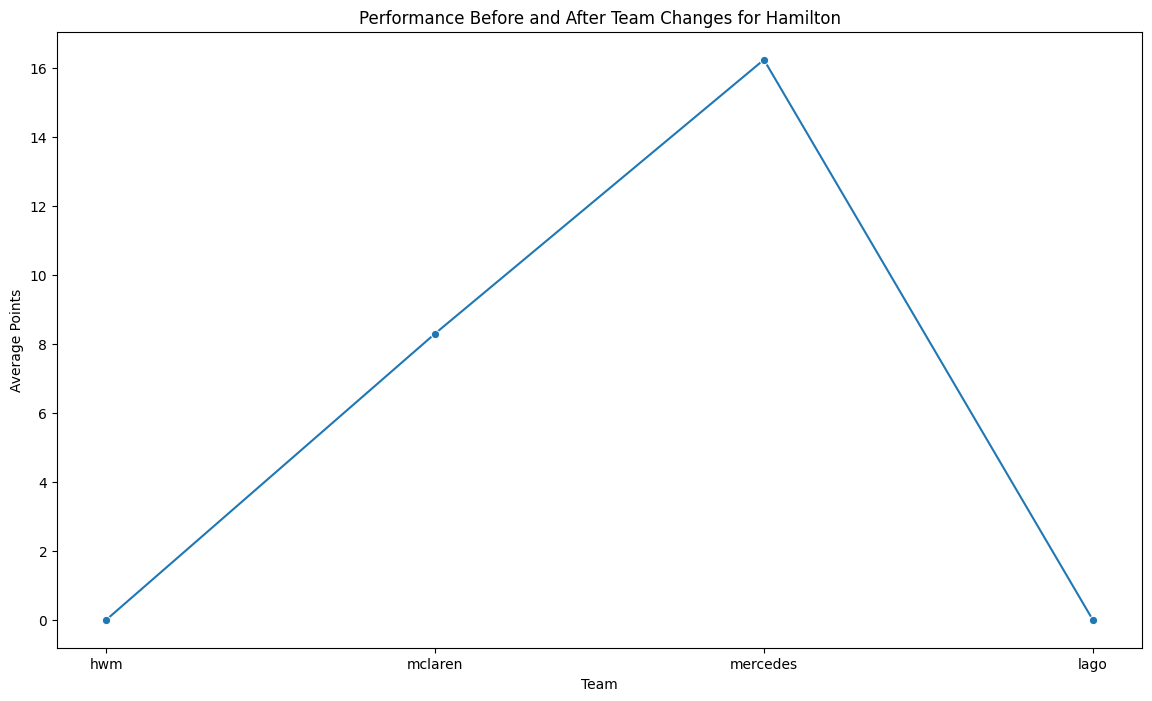

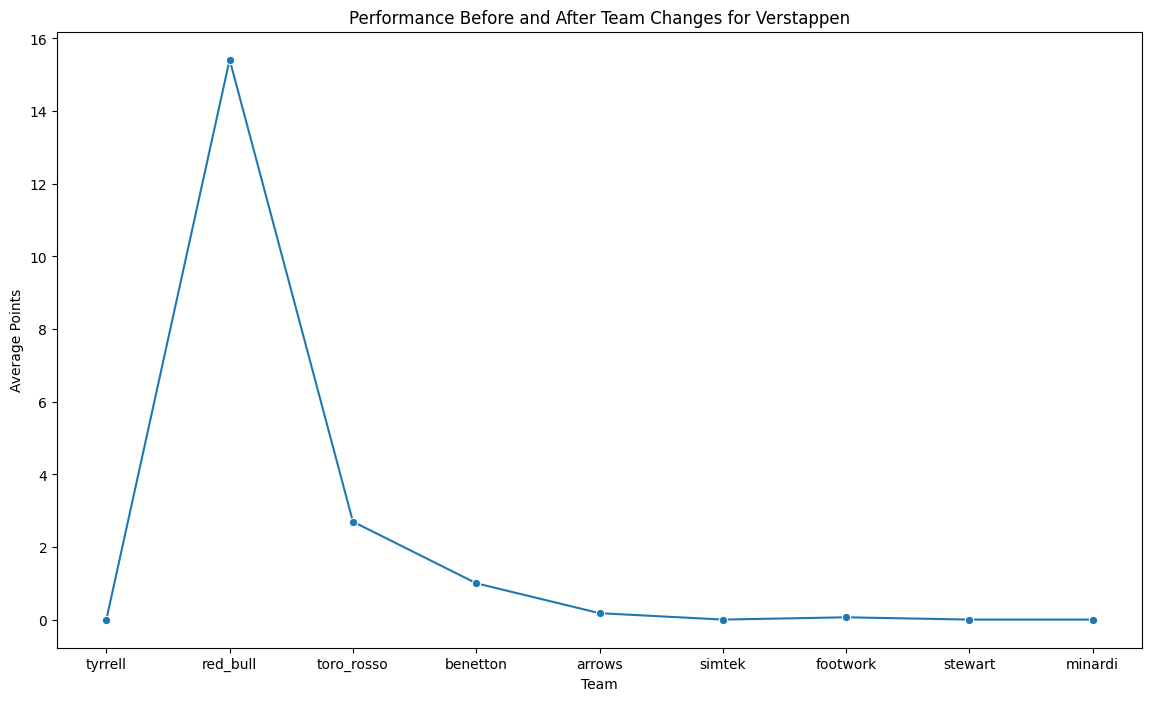

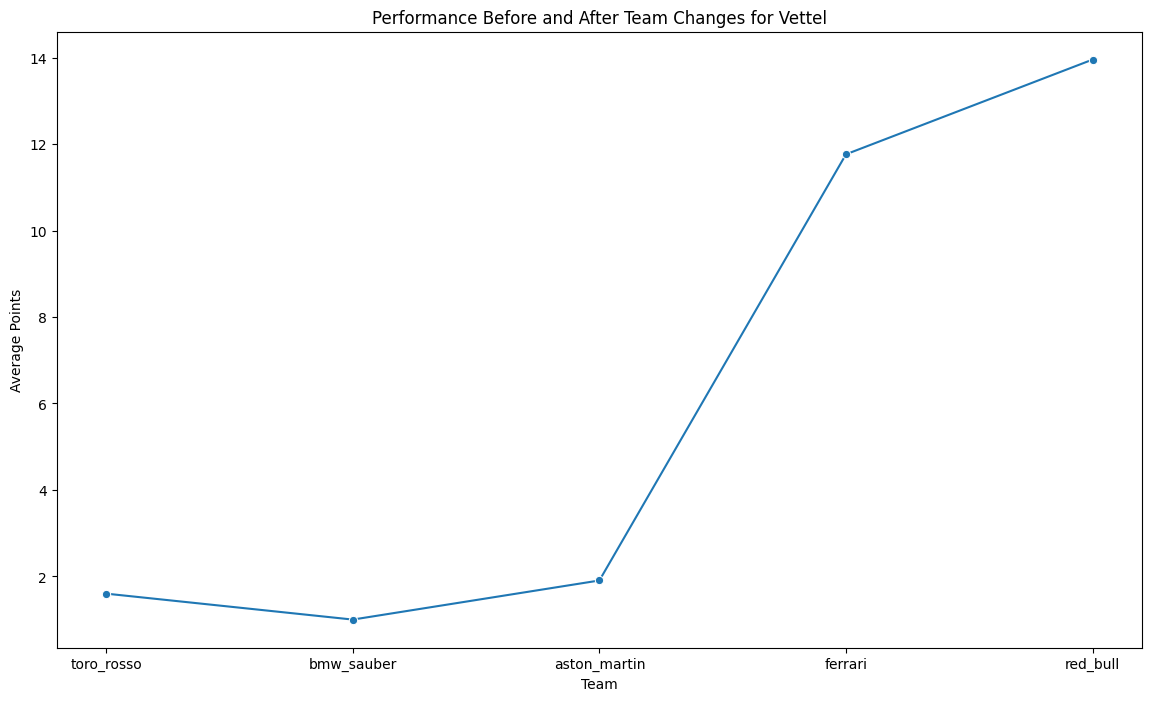

In [ ]:
driver_team_changes_pd = driver_team_changes.toPandas()

driver_name = "Hamilton"  

driver_data = driver_team_changes_pd[driver_team_changes_pd["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_data, x="constructorRef", y="avg_points", marker='o')
plt.title(f"Performance Before and After Team Changes for {driver_name}")
plt.xlabel("Team")
plt.ylabel("Average Points")
plt.show()

driver_name = "Verstappen"  

driver_data = driver_team_changes_pd[driver_team_changes_pd["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_data, x="constructorRef", y="avg_points", marker='o')
plt.title(f"Performance Before and After Team Changes for {driver_name}")
plt.xlabel("Team")
plt.ylabel("Average Points")
plt.show()


driver_name = "Vettel" 

driver_data = driver_team_changes_pd[driver_team_changes_pd["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_data, x="constructorRef", y="avg_points", marker='o')
plt.title(f"Performance Before and After Team Changes for {driver_name}")
plt.xlabel("Team")
plt.ylabel("Average Points")
plt.show()

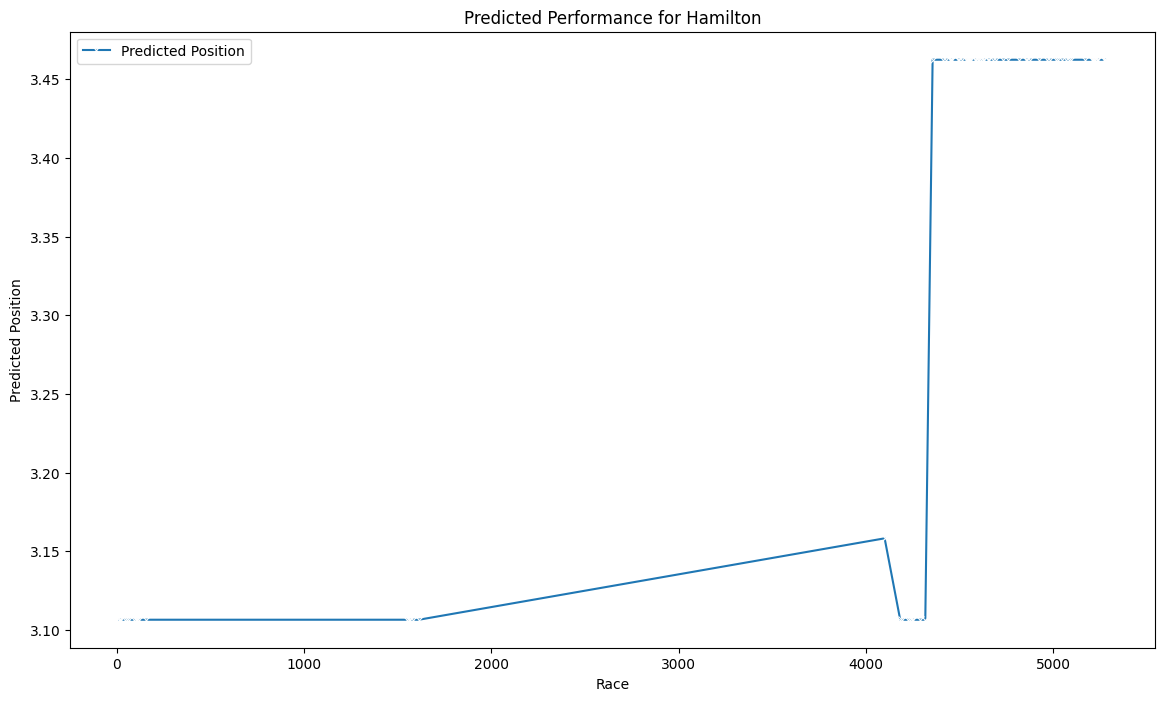

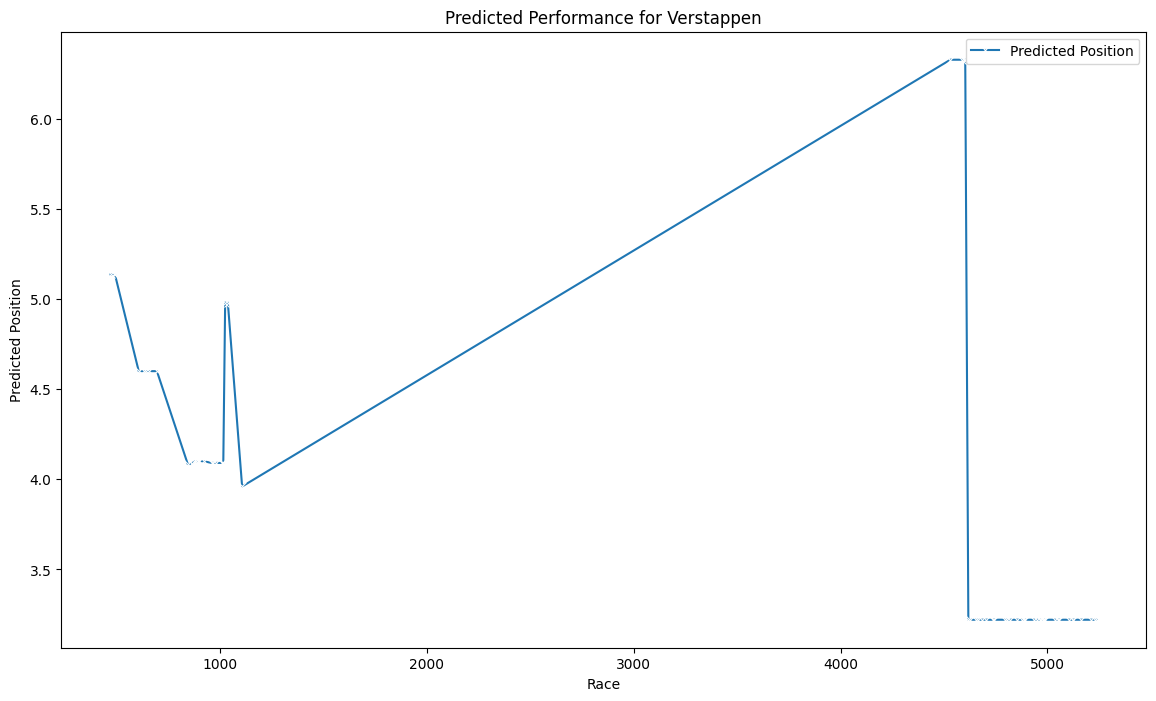

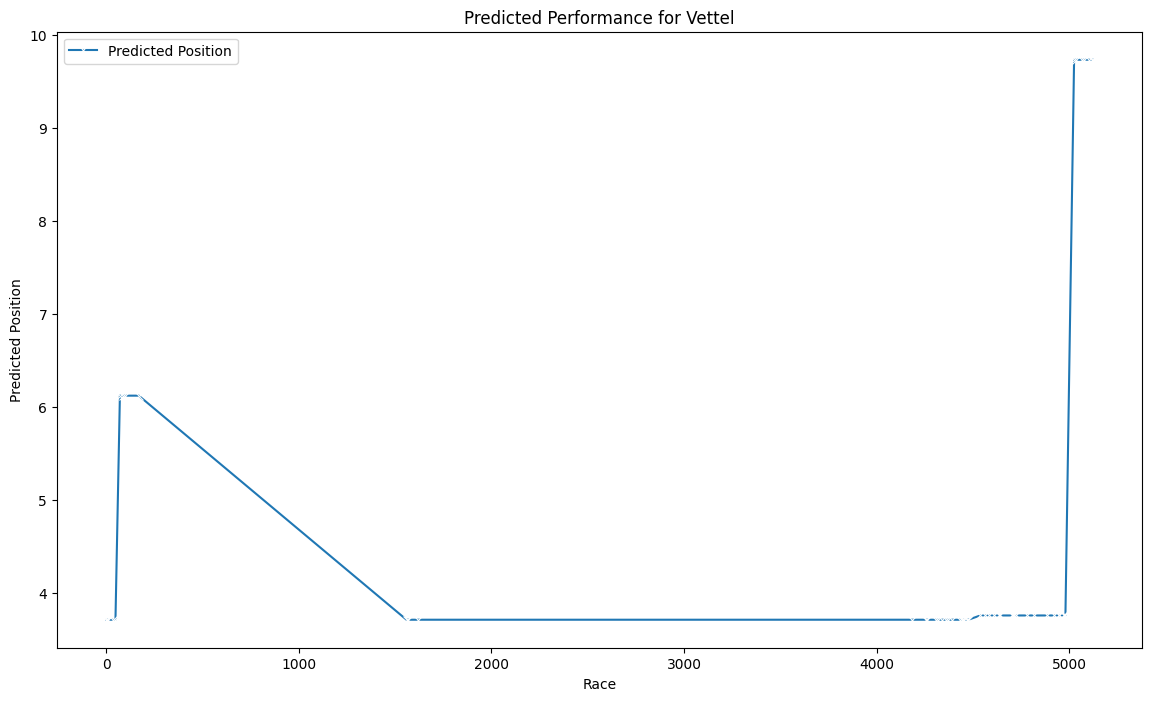

In [ ]:
future_predictions = model.transform(future_races)


predicted_performance = future_predictions.select("forename", "surname", "constructorRef", "prediction").toPandas()
driver_name = "Hamilton"
predicted_performance = predicted_performance[predicted_performance["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=predicted_performance, x=predicted_performance.index, y="prediction", marker='x', label="Predicted Position")
plt.title(f"Predicted Performance for {driver_name}")
plt.xlabel("Race")
plt.ylabel("Predicted Position")
plt.legend()
plt.show()


predicted_performance = future_predictions.select("forename", "surname", "constructorRef", "prediction").toPandas()
driver_name = "Verstappen"
predicted_performance = predicted_performance[predicted_performance["surname"] == driver_name]


plt.figure(figsize=(14, 8))
sns.lineplot(data=predicted_performance, x=predicted_performance.index, y="prediction", marker='x', label="Predicted Position")
plt.title(f"Predicted Performance for {driver_name}")
plt.xlabel("Race")
plt.ylabel("Predicted Position")
plt.legend()
plt.show()

predicted_performance = future_predictions.select("forename", "surname", "constructorRef", "prediction").toPandas()
driver_name = "Vettel"
predicted_performance = predicted_performance[predicted_performance["surname"] == driver_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=predicted_performance, x=predicted_performance.index, y="prediction", marker='x', label="Predicted Position")
plt.title(f"Predicted Performance for {driver_name}")
plt.xlabel("Race")
plt.ylabel("Predicted Position")
plt.legend()
plt.show()


## **Team Strategy Analysis**

> - Analyzing pit stop strategies and their impact on race outcomes
> - Evaluate fuel management and tire selection strategies
> - Investigate the correlation between qualifying positions and final race results

### **Analyzing pit stop strategies and their impact on race outcomes**

+---------------+------------------+
|total_pit_stops|avg_final_position|
+---------------+------------------+
|              7|13.666666666666666|
|              6|10.384615384615385|
|              5|10.285714285714286|
|              1|10.282921219091431|
|              3|10.919923736892278|
|              2| 10.16214953271028|
|              4|10.973154362416107|
+---------------+------------------+



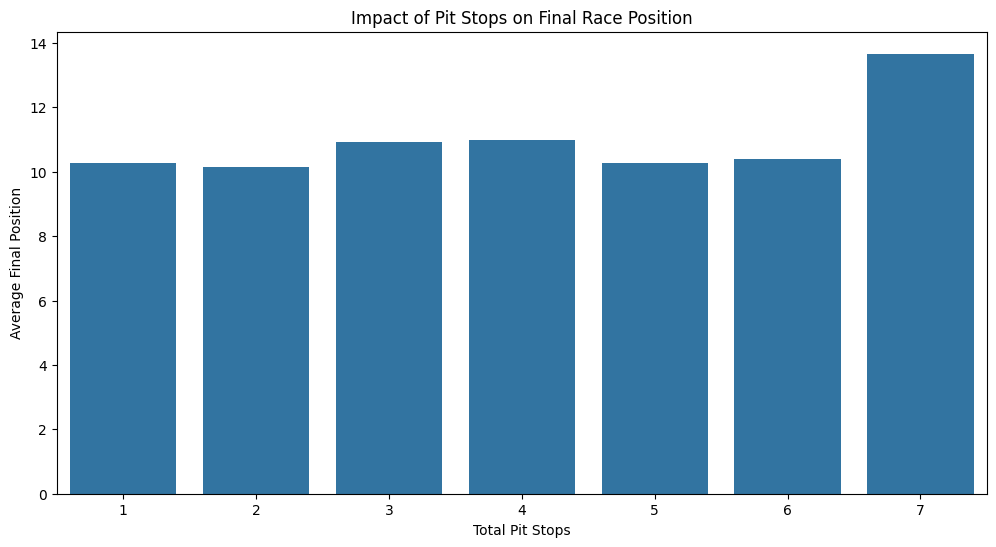

In [ ]:
from pyspark.sql.functions import col, avg, count


pit_stops = spark.read.csv("dataset/pit_stops.csv", header=True, inferSchema=True)
results = spark.read.csv("dataset/results.csv", header=True, inferSchema=True)
results = results.withColumnRenamed("milliseconds", "results_milliseconds")

pit_stop_results = pit_stops.join(results, ["raceId", "driverId"], "inner")
pit_stop_summary = pit_stop_results.groupBy("raceId", "driverId")\
    .agg(count("stop").alias("total_pit_stops"), avg("milliseconds").alias("avg_pit_stop_duration"))

final_positions = pit_stop_summary.join(results.select("raceId", "driverId", "positionOrder"), ["raceId", "driverId"])

pit_stop_impact = final_positions.groupBy("total_pit_stops")\
    .agg(avg("positionOrder").alias("avg_final_position"))

pit_stop_impact.show()

pit_stop_impact_pd = pit_stop_impact.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=pit_stop_impact_pd, x="total_pit_stops", y="avg_final_position")
plt.title("Impact of Pit Stops on Final Race Position")
plt.xlabel("Total Pit Stops")
plt.ylabel("Average Final Position")
plt.show()


### **Evaluate Fuel Management and Tire Selection Strategies**

+--------+------------------+
|tireType|avg_final_position|
+--------+------------------+
|       1|12.337915358805066|
|       2| 12.84077079107505|
|       0|13.311563169164883|
+--------+------------------+



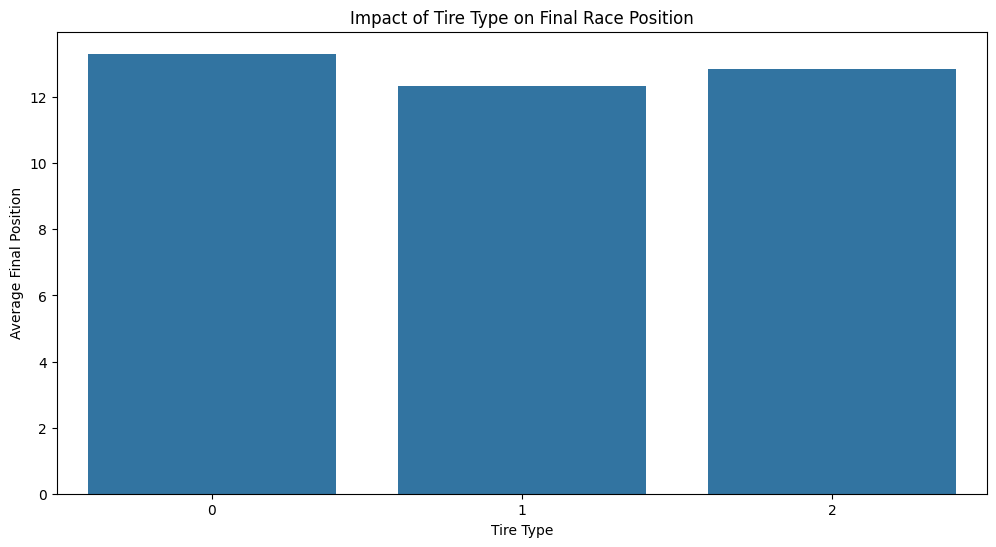

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

results = results.withColumn("tireType", (col("positionOrder") % 3).cast("int"))  # Hypothetical: 3 types of tires
results = results.withColumn("fuelLoad", (col("positionOrder") * 10).cast("int"))  # Hypothetical fuel load

tire_impact = results.groupBy("tireType")\
    .agg(avg("positionOrder").alias("avg_final_position"))

tire_impact.show()

tire_impact_pd = tire_impact.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=tire_impact_pd, x="tireType", y="avg_final_position")
plt.title("Impact of Tire Type on Final Race Position")
plt.xlabel("Tire Type")
plt.ylabel("Average Final Position")
plt.show()


+-------------+------------------+
|fuelLoadRange|avg_final_position|
+-------------+------------------+
|            0|2.5024531668153434|
|           50| 6.999642793355957|
|          150|16.974510528260065|
|          250| 26.61593172119488|
|          100|11.995878874753629|
|          200|  21.6112708453134|
|          350|36.648936170212764|
|          300| 31.41252699784017|
+-------------+------------------+



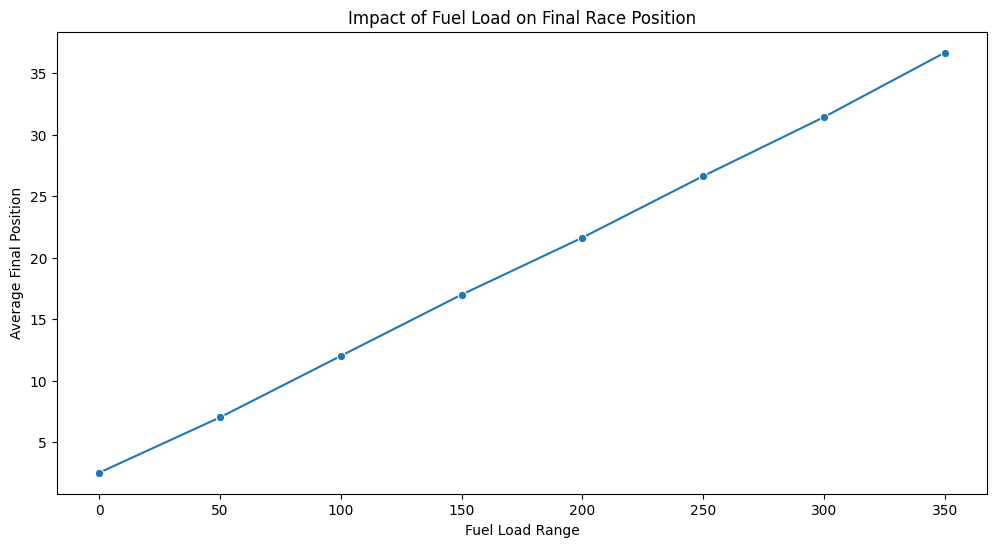

In [ ]:
from pyspark.sql.functions import floor

fuel_impact = results.withColumn("fuelLoadRange", floor(col("fuelLoad") / 50) * 50)\
    .groupBy("fuelLoadRange")\
    .agg(avg("positionOrder").alias("avg_final_position"))

fuel_impact.show()

fuel_impact_pd = fuel_impact.toPandas()
plt.figure(figsize=(12, 6))
sns.lineplot(data=fuel_impact_pd, x="fuelLoadRange", y="avg_final_position", marker='o')
plt.title("Impact of Fuel Load on Final Race Position")
plt.xlabel("Fuel Load Range")
plt.ylabel("Average Final Position")
plt.show()


### **Investigate the Correlation Between Qualifying Positions and Final Race Results**

Correlation between qualifying position and final position: 0.5736322997073999


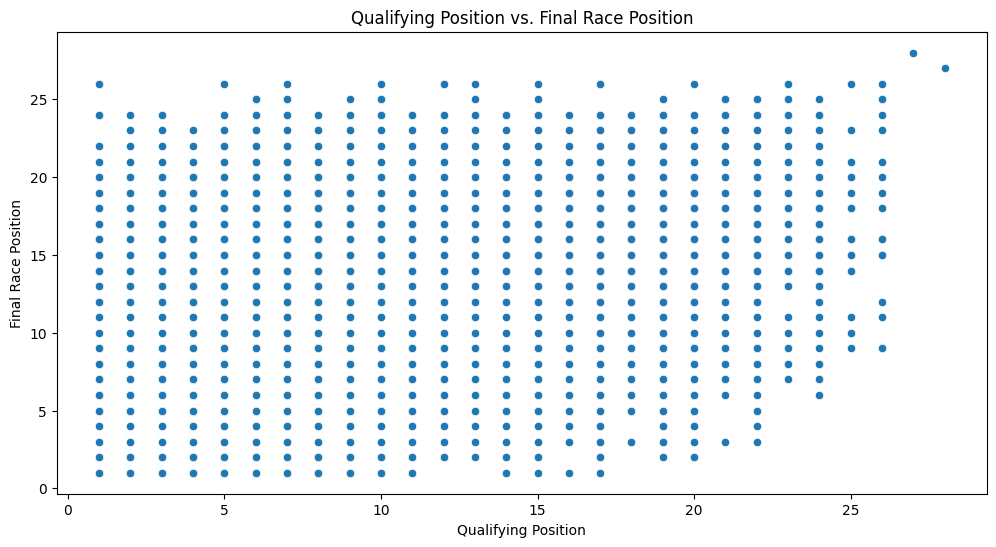

In [ ]:
qualifying = spark.read.csv("dataset/qualifying.csv", header=True, inferSchema=True)

results = results.withColumnRenamed("position", "results_position")
qualifying_results = qualifying.join(results, ["raceId", "driverId"], "inner")


qualifying_final_positions = qualifying_results.select("qualifyId", "raceId", "driverId", "position", "positionOrder")


correlation = qualifying_final_positions.stat.corr("position", "positionOrder")
print(f"Correlation between qualifying position and final position: {correlation}")


qualifying_final_positions_pd = qualifying_final_positions.toPandas()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=qualifying_final_positions_pd, x="position", y="positionOrder")
plt.title("Qualifying Position vs. Final Race Position")
plt.xlabel("Qualifying Position")
plt.ylabel("Final Race Position")
plt.show()


+---------------+---------------------+
|total_pit_stops|probability_of_top_10|
+---------------+---------------------+
|              7|                  0.0|
|              6|                  0.5|
|              5|   0.5164835164835165|
|              1|   0.5434157561817137|
|              3|   0.4652049571020019|
|              2|   0.5158878504672897|
|              4|   0.4429530201342282|
+---------------+---------------------+



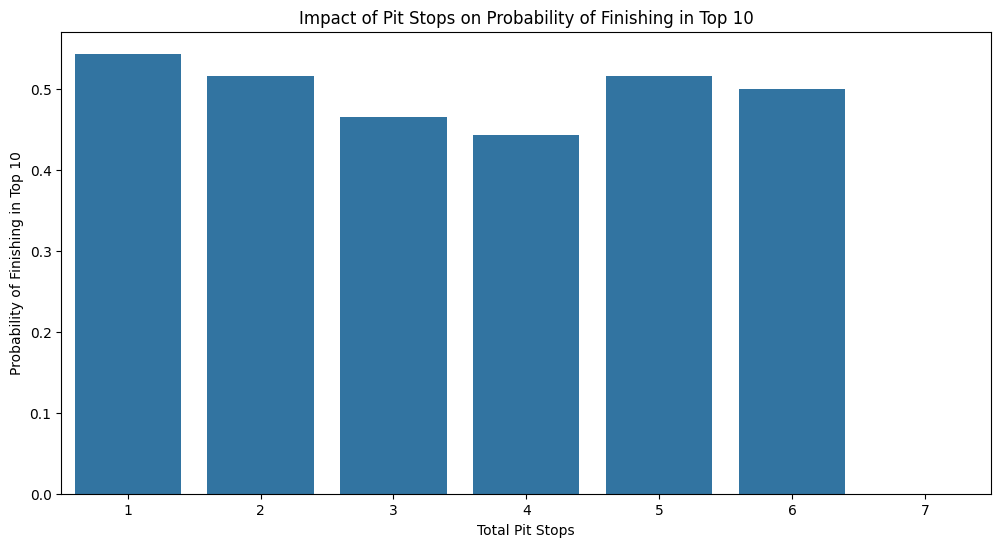

In [ ]:
top_10_impact = final_positions.withColumn("top_10", (col("positionOrder") <= 10).cast("int"))\
    .groupBy("total_pit_stops")\
    .agg(avg("top_10").alias("probability_of_top_10"))


top_10_impact.show()


top_10_impact_pd = top_10_impact.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_impact_pd, x="total_pit_stops", y="probability_of_top_10")
plt.title("Impact of Pit Stops on Probability of Finishing in Top 10")
plt.xlabel("Total Pit Stops")
plt.ylabel("Probability of Finishing in Top 10")
plt.show()


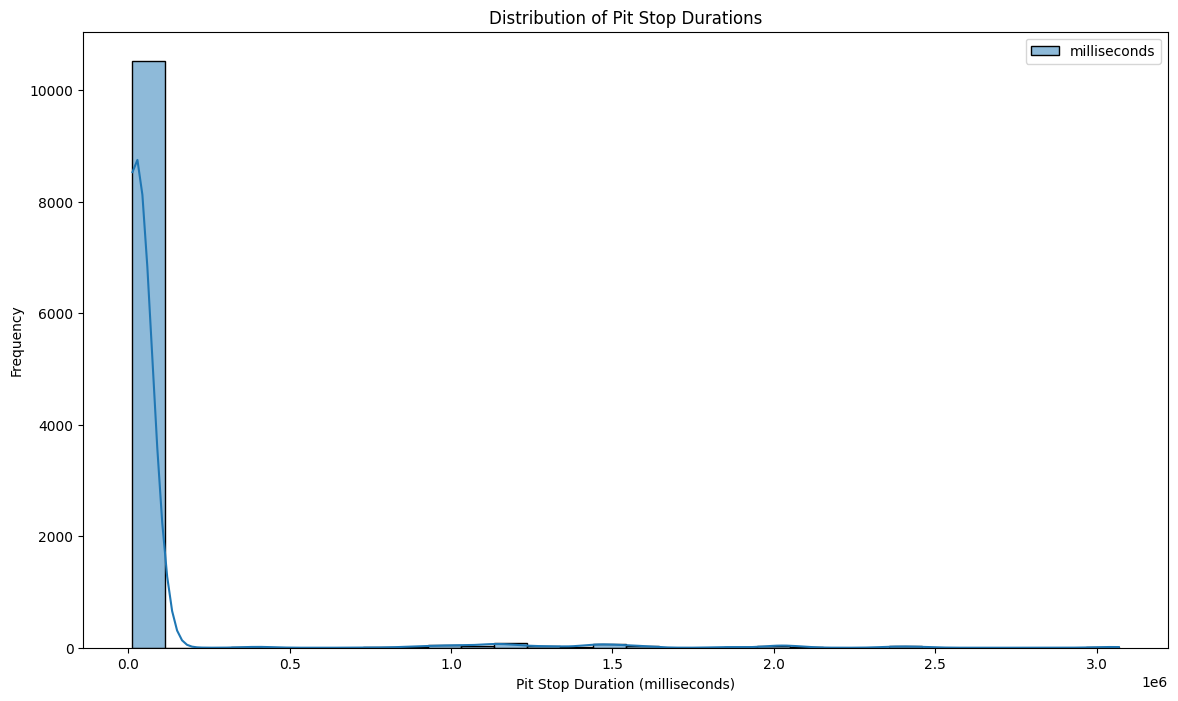

In [ ]:
pit_stop_durations = pit_stops.select("milliseconds").toPandas()

plt.figure(figsize=(14, 8))
sns.histplot(pit_stop_durations, bins=30, kde=True)
plt.title("Distribution of Pit Stop Durations")
plt.xlabel("Pit Stop Duration (milliseconds)")
plt.ylabel("Frequency")
plt.show()


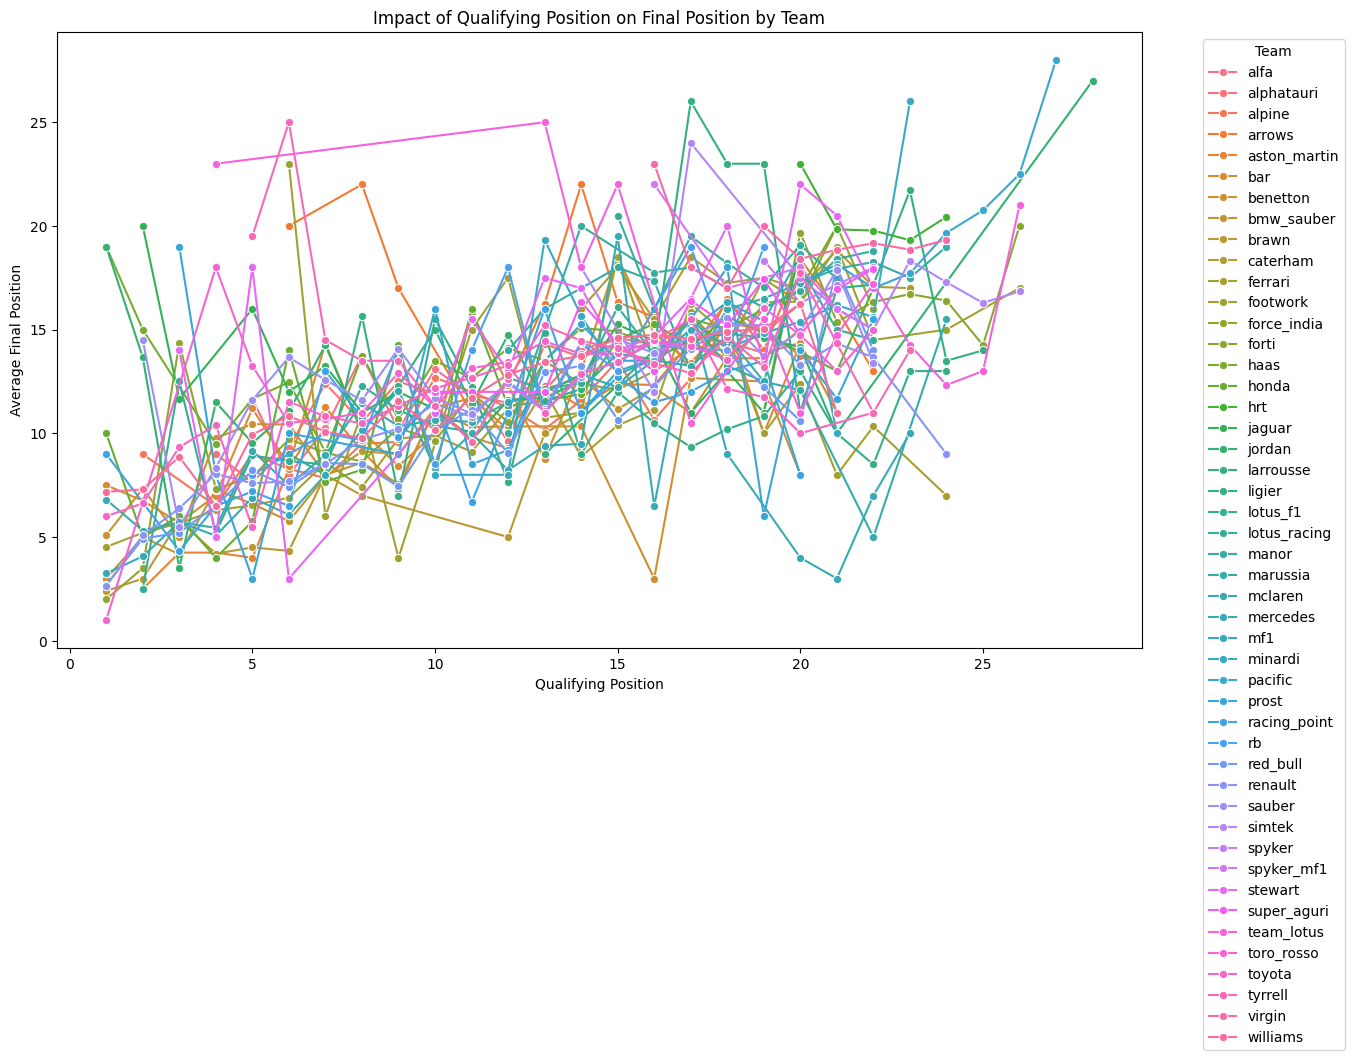

In [ ]:
constructors = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)


qualifying_team_results = qualifying_results.join(constructors, "constructorId")


qualifying_team_positions = qualifying_team_results.select("constructorRef", "position", "positionOrder")


team_qualifying_impact = qualifying_team_positions.groupBy("constructorRef", "position")\
    .agg(avg("positionOrder").alias("avg_final_position"))\
    .orderBy("constructorRef", "position")


team_qualifying_impact_pd = team_qualifying_impact.toPandas()

plt.figure(figsize=(14, 8))
sns.lineplot(data=team_qualifying_impact_pd, x="position", y="avg_final_position", hue="constructorRef", marker='o')
plt.title("Impact of Qualifying Position on Final Position by Team")
plt.xlabel("Qualifying Position")
plt.ylabel("Average Final Position")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


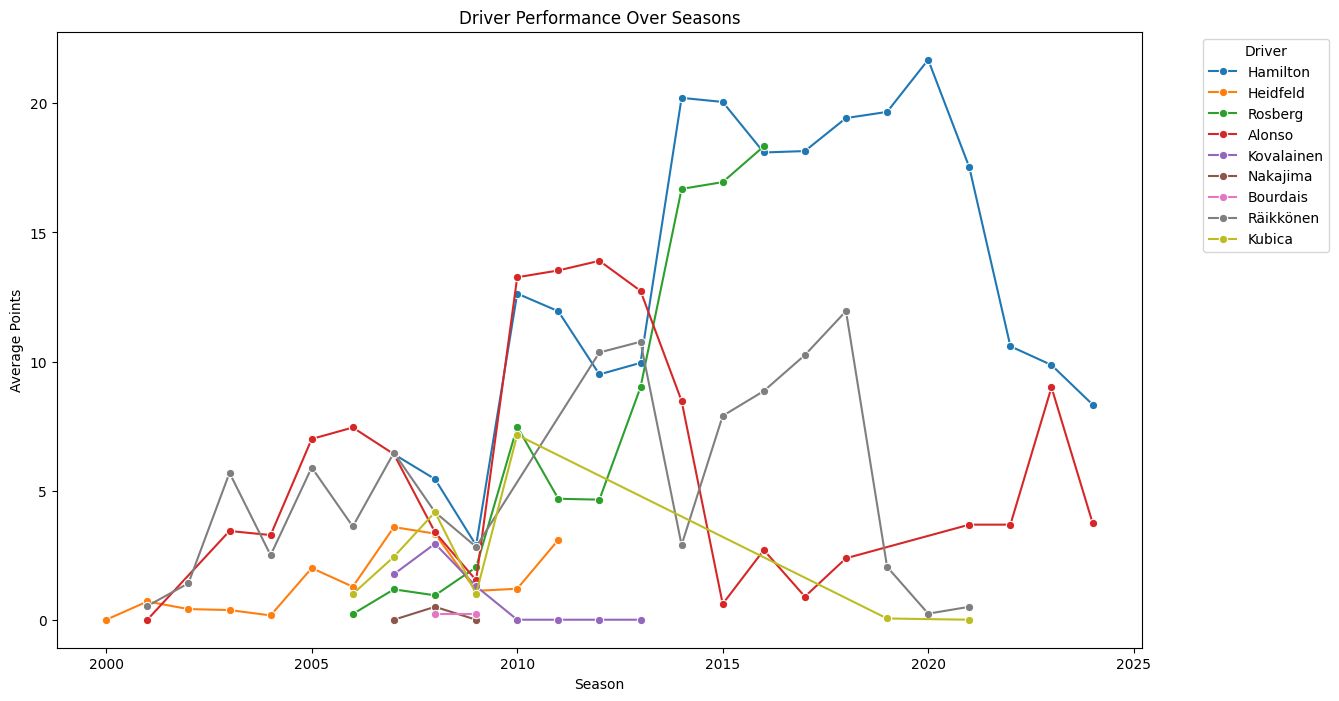

In [ ]:
races = spark.read.csv("dataset/races.csv", header=True, inferSchema=True)
drivers = spark.read.csv("dataset/drivers.csv", header=True, inferSchema=True)


driver_season_performance = results.join(races, "raceId")\
    .join(drivers, "driverId")\
    .select("driverId", "forename", "surname", "year", "points")


driver_season_avg_points = driver_season_performance.groupBy("driverId", "forename", "surname", "year")\
    .agg(avg("points").alias("avg_points"))\
    .orderBy("driverId", "year")


driver_season_avg_points_pd = driver_season_avg_points.toPandas()

driver_season_avg_points_pd = driver_season_avg_points_pd.head(100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_season_avg_points_pd, x="year", y="avg_points", hue="surname", marker='o')
plt.title("Driver Performance Over Seasons")
plt.xlabel("Season")
plt.ylabel("Average Points")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## **Lap Time Analysis**

> - Visualizing lap time distributions for different tracks and conditions
> - Identifying trends and anomalies in lap times
> - Compare lap times across different driver and teams

### **Visualizing lap time distributions for different tracks and conditions**

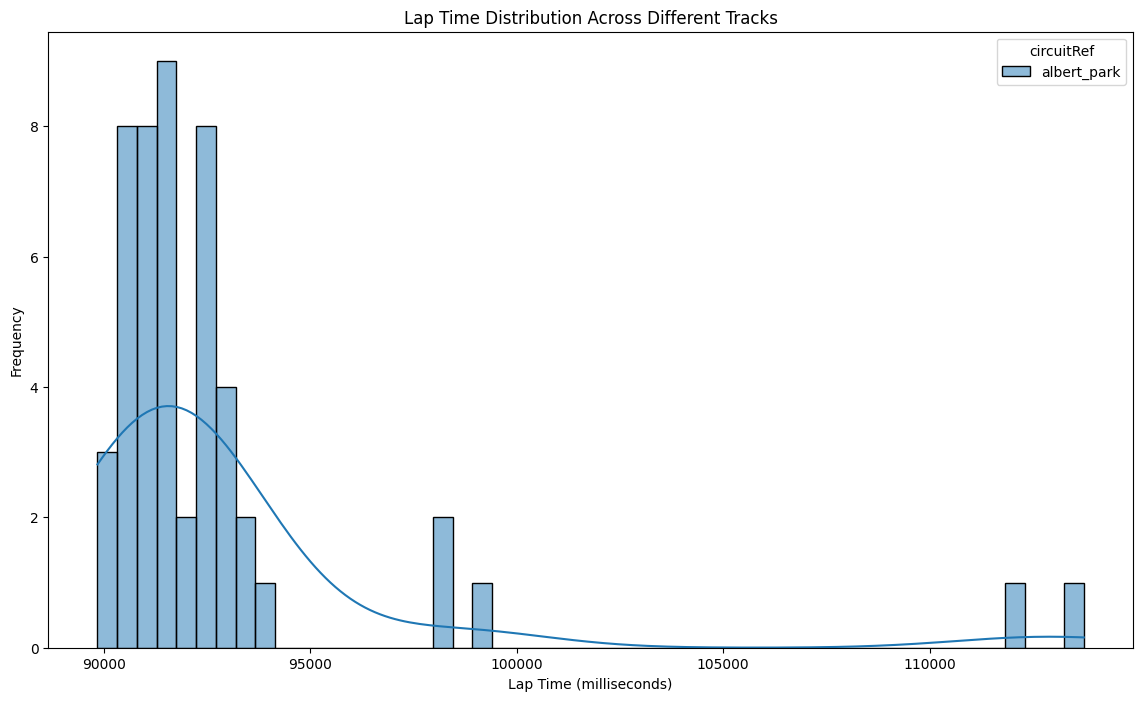

In [ ]:
lap_times = spark.read.csv("dataset/lap_times.csv", header=True, inferSchema=True)
lap_times = lap_times.withColumnRenamed("time", "lap_time")
races = spark.read.csv("dataset/races.csv", header=True, inferSchema=True)
circuits = spark.read.csv("dataset/circuits.csv", header=True, inferSchema=True)


lap_times_races = lap_times.join(races, "raceId").join(circuits, "circuitId")

lap_times_races = lap_times_races.select("raceId", "driverId", "circuitRef", "lap", "position", "time", "milliseconds", "year")

lap_times_races_pd = lap_times_races.toPandas().head(50)

plt.figure(figsize=(14, 8))
sns.histplot(data=lap_times_races_pd, x="milliseconds", hue="circuitRef", bins=50, kde=True)
plt.title("Lap Time Distribution Across Different Tracks")
plt.xlabel("Lap Time (milliseconds)")
plt.ylabel("Frequency")
plt.show()

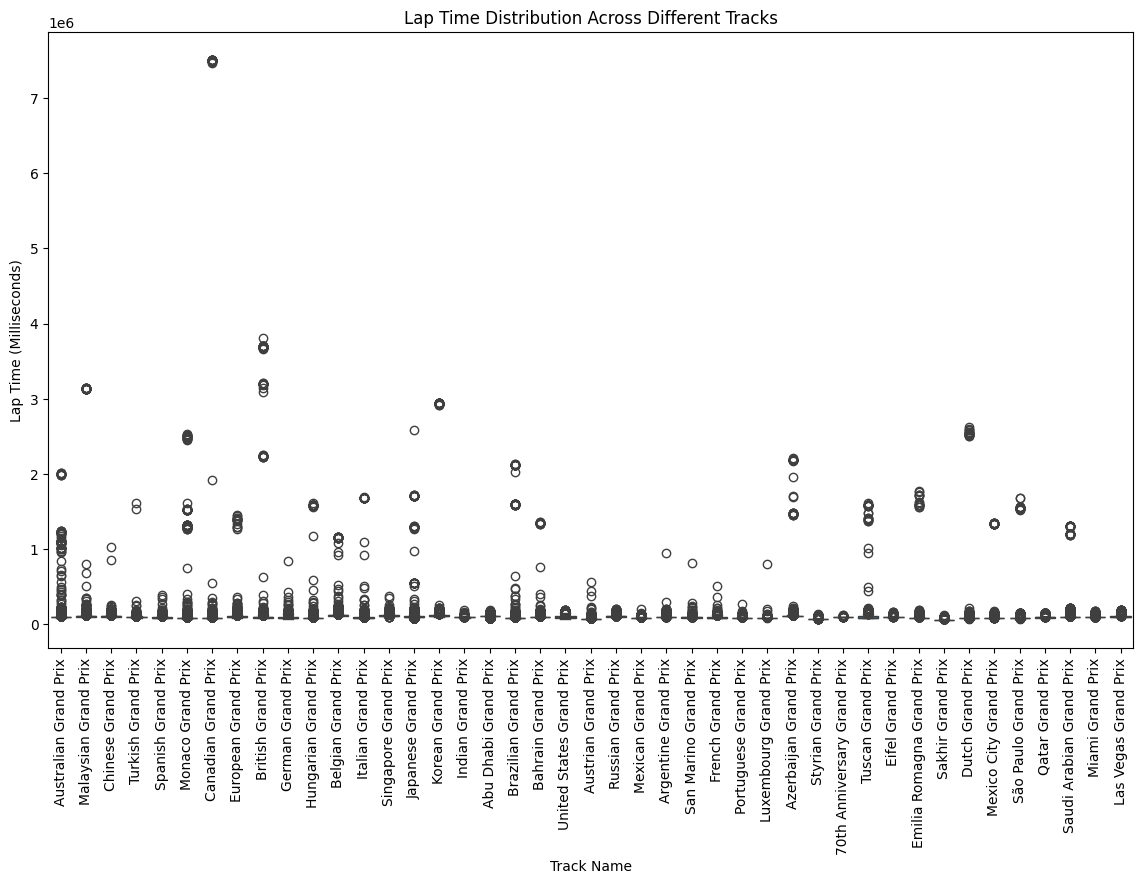

In [ ]:
lap_times_df = lap_times.join(races, lap_times["raceId"] == races["raceId"]) \
                        .select("lap", "milliseconds", "circuitId", "name", "date")

lap_times_pd = lap_times_df.toPandas()

plt.figure(figsize=(14, 8))
sns.boxplot(x="name", y="milliseconds", data=lap_times_pd)
plt.xticks(rotation=90)
plt.title("Lap Time Distribution Across Different Tracks")
plt.xlabel("Track Name")
plt.ylabel("Lap Time (Milliseconds)")
plt.show()


### **Identifying trends and anomailes in Lap Times**

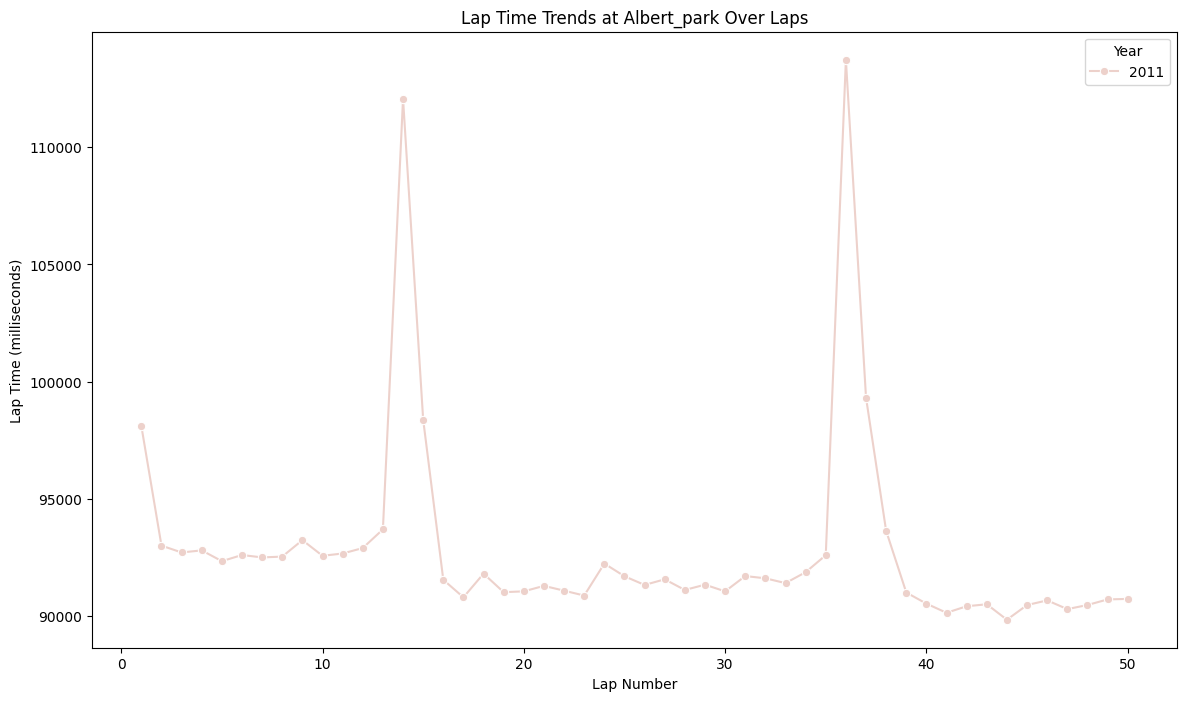

In [ ]:
track_name = "albert_park"
track_data = lap_times_races_pd[lap_times_races_pd["circuitRef"] == track_name]

plt.figure(figsize=(14, 8))
sns.lineplot(data=track_data, x="lap", y="milliseconds", hue="year", marker='o')
plt.title(f"Lap Time Trends at {track_name.capitalize()} Over Laps")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.legend(title='Year')
plt.show()


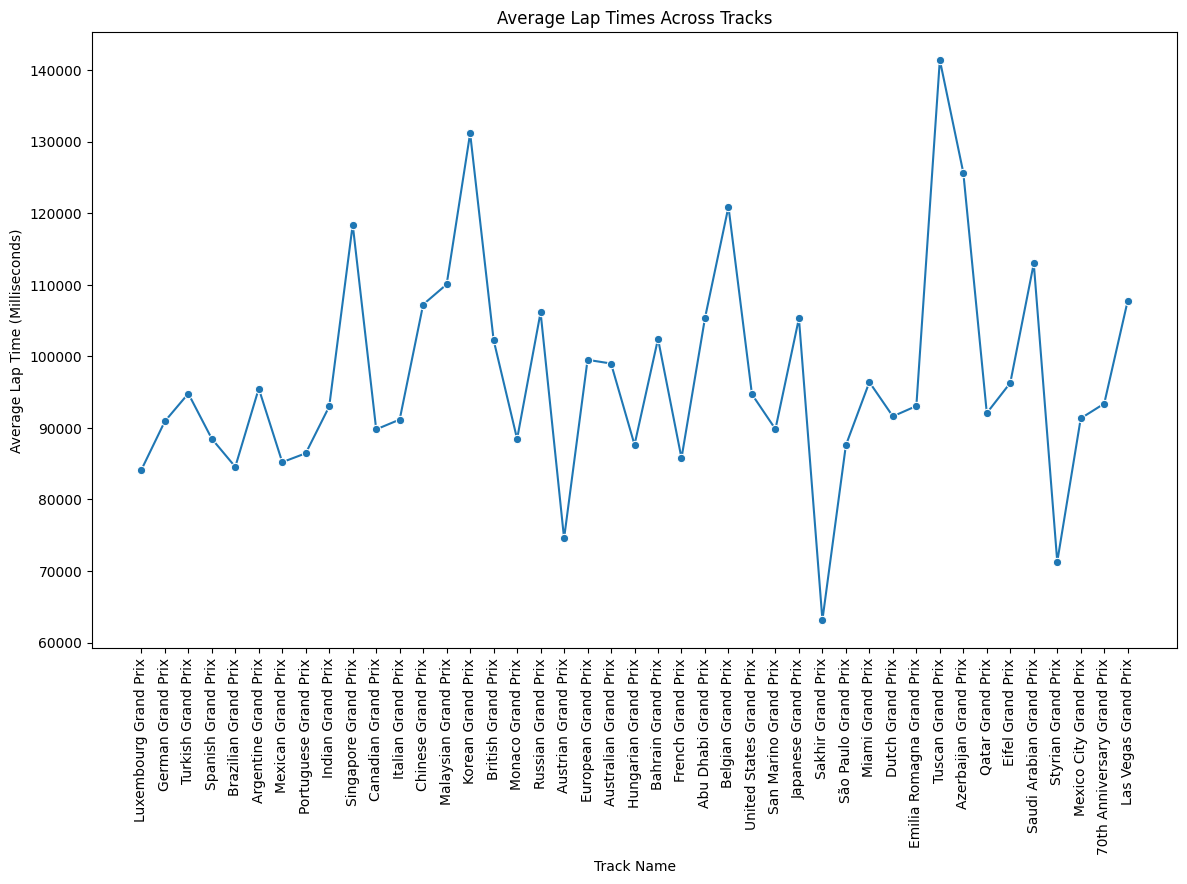

Anomalies Detected in Average Lap Times:
                 name   avg_lap_time   z_score
14  Korean Grand Prix  131153.806466  2.280625
29  Sakhir Grand Prix   63150.259308 -2.277090
34  Tuscan Grand Prix  141405.245501  2.967694


In [ ]:
avg_lap_times = lap_times_df.groupBy("name").agg(avg("milliseconds").alias("avg_lap_time"))

avg_lap_times_pd = avg_lap_times.toPandas()

plt.figure(figsize=(14, 8))
sns.lineplot(x="name", y="avg_lap_time", data=avg_lap_times_pd, marker='o')
plt.xticks(rotation=90)
plt.title("Average Lap Times Across Tracks")
plt.xlabel("Track Name")
plt.ylabel("Average Lap Time (Milliseconds)")
plt.show()

from scipy.stats import zscore

avg_lap_times_pd['z_score'] = zscore(avg_lap_times_pd['avg_lap_time'])
anomalies = avg_lap_times_pd[avg_lap_times_pd['z_score'].abs() > 2]

print("Anomalies Detected in Average Lap Times:")
print(anomalies)


### **Compare lap time across different drivers and teams**

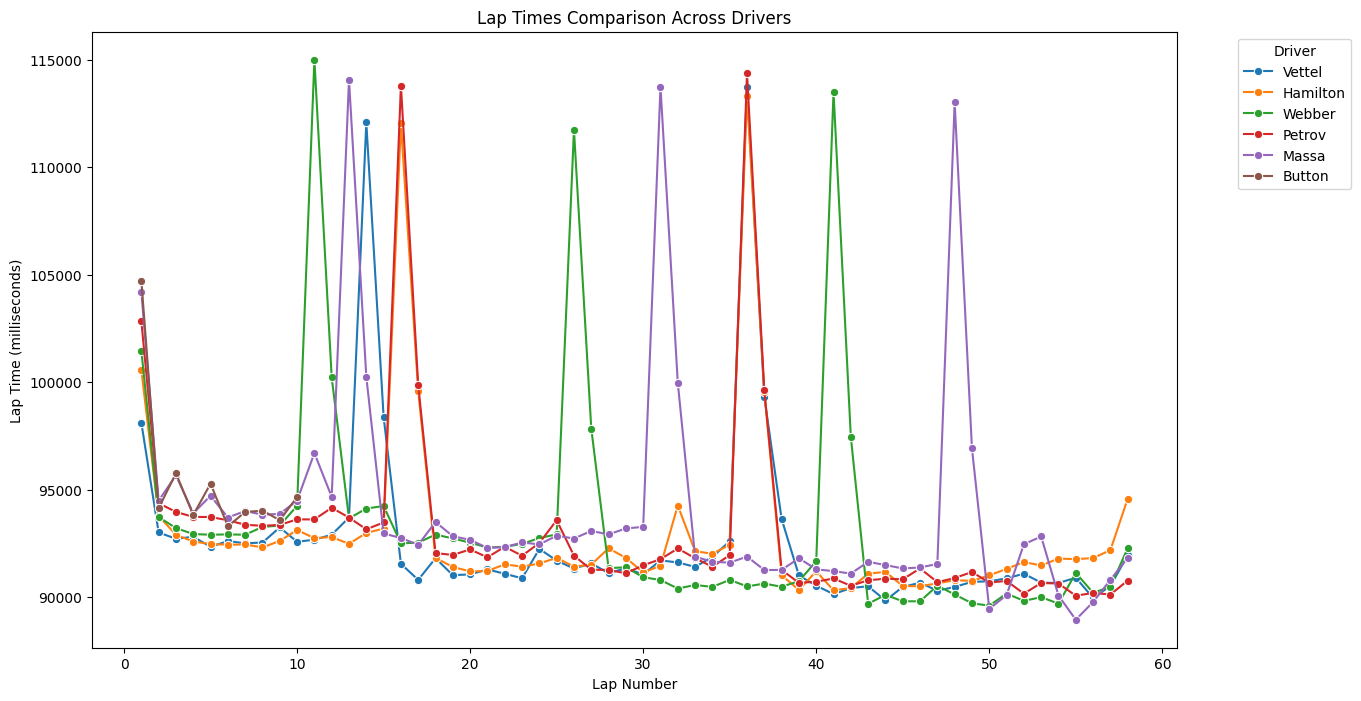

In [ ]:
drivers = spark.read.csv("dataset/drivers.csv", header=True, inferSchema=True)
constructors = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)

lap_times_drivers = lap_times_races.join(drivers, "driverId").join(results, ["raceId", "driverId"])
lap_times_teams = lap_times_drivers.join(constructors, "constructorId")


lap_times_teams = lap_times_teams.select("raceId", "driverId", "forename", "surname", "constructorRef", "lap", "milliseconds")

lap_times_teams_pd = lap_times_teams.toPandas().head(300)

plt.figure(figsize=(14, 8))
sns.lineplot(data=lap_times_teams_pd, x="lap", y="milliseconds", hue="surname", marker='o')
plt.title("Lap Times Comparison Across Drivers")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

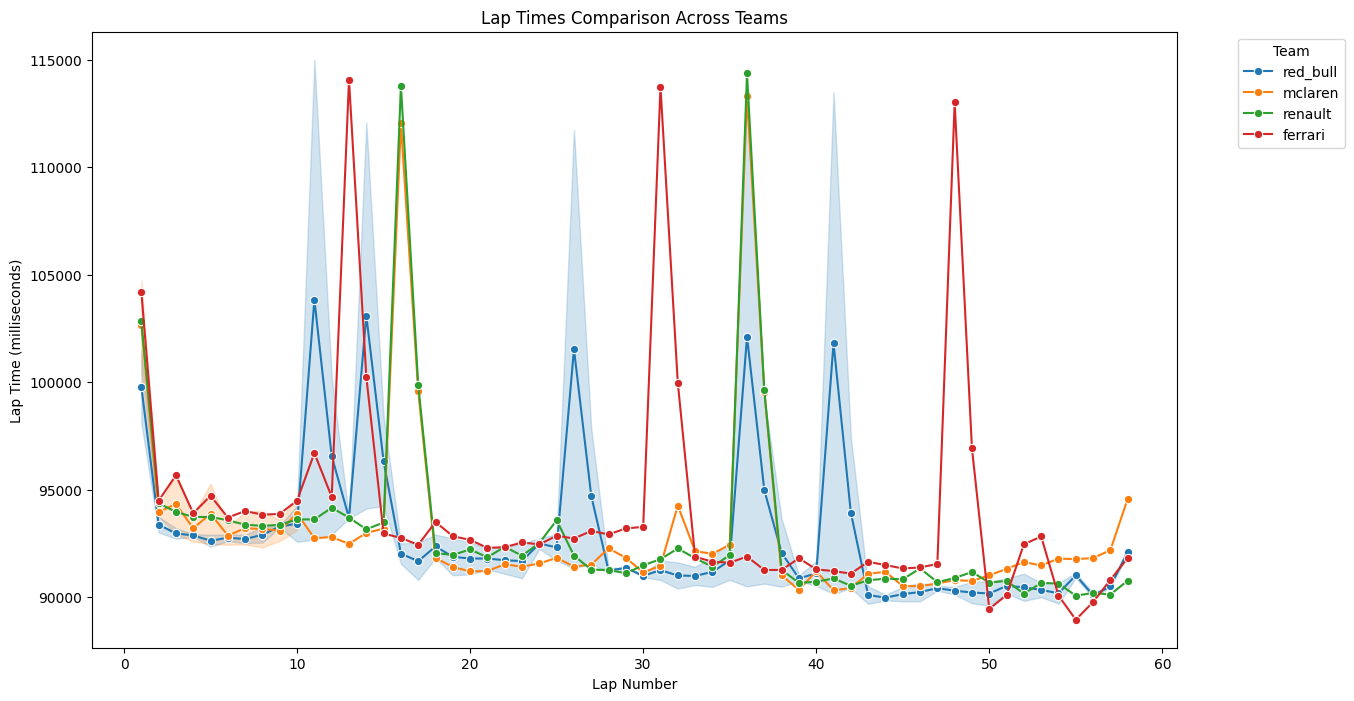

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=lap_times_teams_pd, x="lap", y="milliseconds", hue="constructorRef", marker='o')
plt.title("Lap Times Comparison Across Teams")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


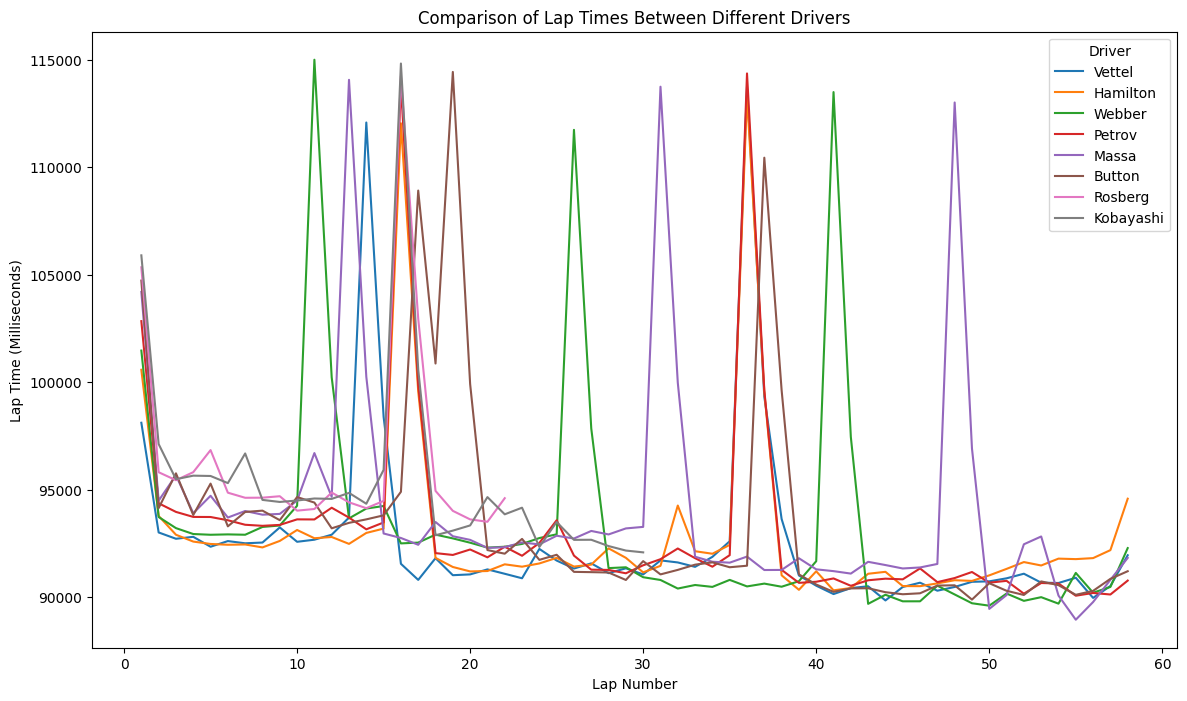

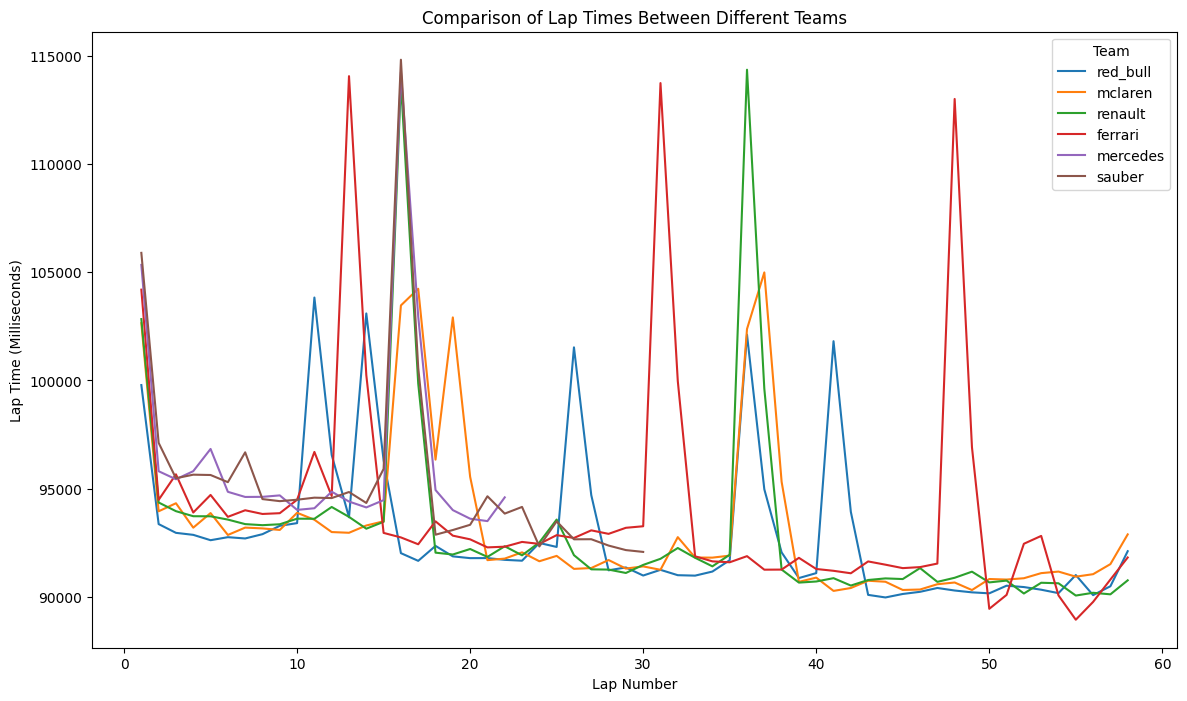

In [ ]:
lap_times_results = lap_times.join(results, on=["raceId", "driverId"])

lap_times_drivers = lap_times_results.join(drivers, "driverId")

lap_times_drivers_constructors = lap_times_drivers.join(constructors, "constructorId")

lap_times_drivers_constructors_pd = lap_times_drivers_constructors.toPandas().head(400)

plt.figure(figsize=(14, 8))
sns.lineplot(data=lap_times_drivers_constructors_pd, x="lap", y="milliseconds", hue="surname", errorbar=None)
plt.title("Comparison of Lap Times Between Different Drivers")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (Milliseconds)")
plt.legend(title="Driver")
plt.show()


plt.figure(figsize=(14, 8))
sns.lineplot(data=lap_times_drivers_constructors_pd, x="lap", y="milliseconds", hue="constructorRef", errorbar=None)
plt.title("Comparison of Lap Times Between Different Teams")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (Milliseconds)")
plt.legend(title="Team")
plt.show()

### **Analyzing Lap Time Improvements Over Time**

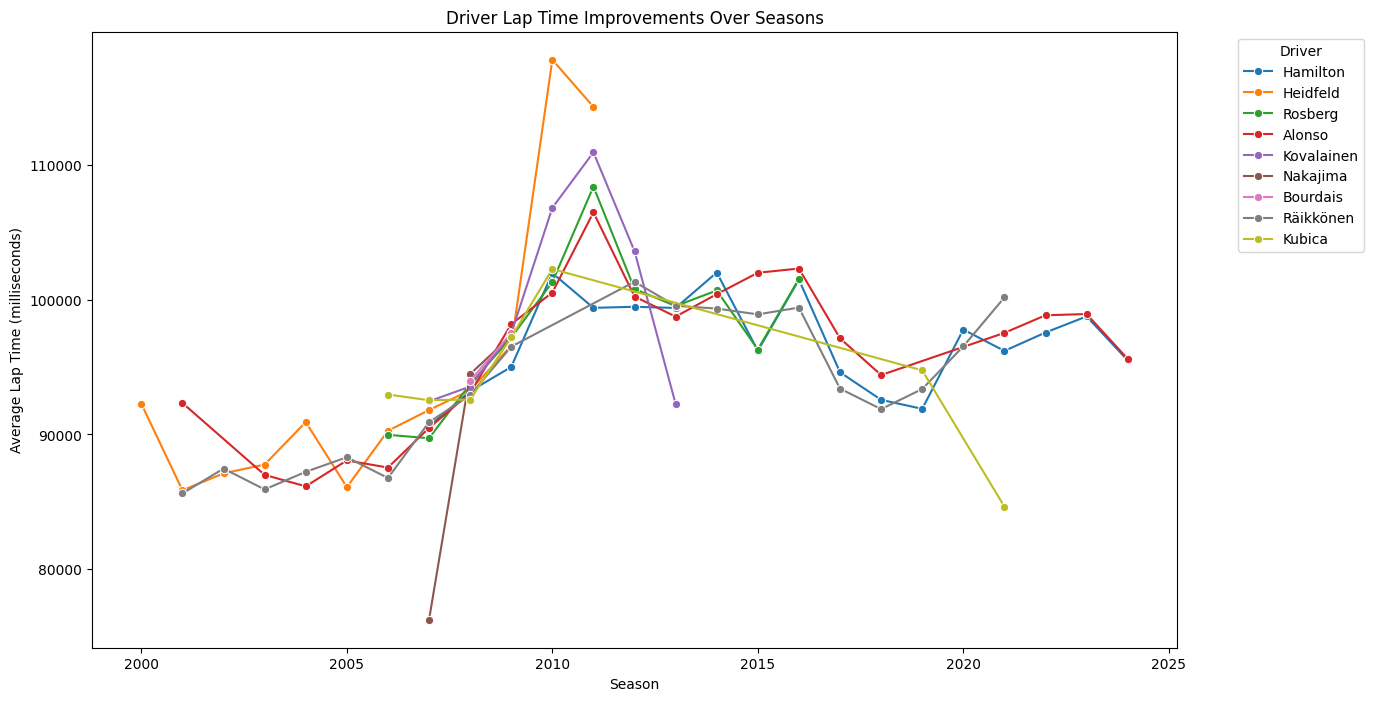

In [ ]:
lap_times_teams_with_year = lap_times_teams.join(races, "raceId")

driver_lap_time_trends = lap_times_teams_with_year.groupBy("driverId", "forename", "surname", "year")\
    .agg(avg("milliseconds").alias("avg_lap_time"))\
    .orderBy("driverId", "year")

driver_lap_time_trends_pd = driver_lap_time_trends.toPandas().head(100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=driver_lap_time_trends_pd, x="year", y="avg_lap_time", hue="surname", marker='o')
plt.title("Driver Lap Time Improvements Over Seasons")
plt.xlabel("Season")
plt.ylabel("Average Lap Time (milliseconds)")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Advanced Pit Stop Strategy Analysis**

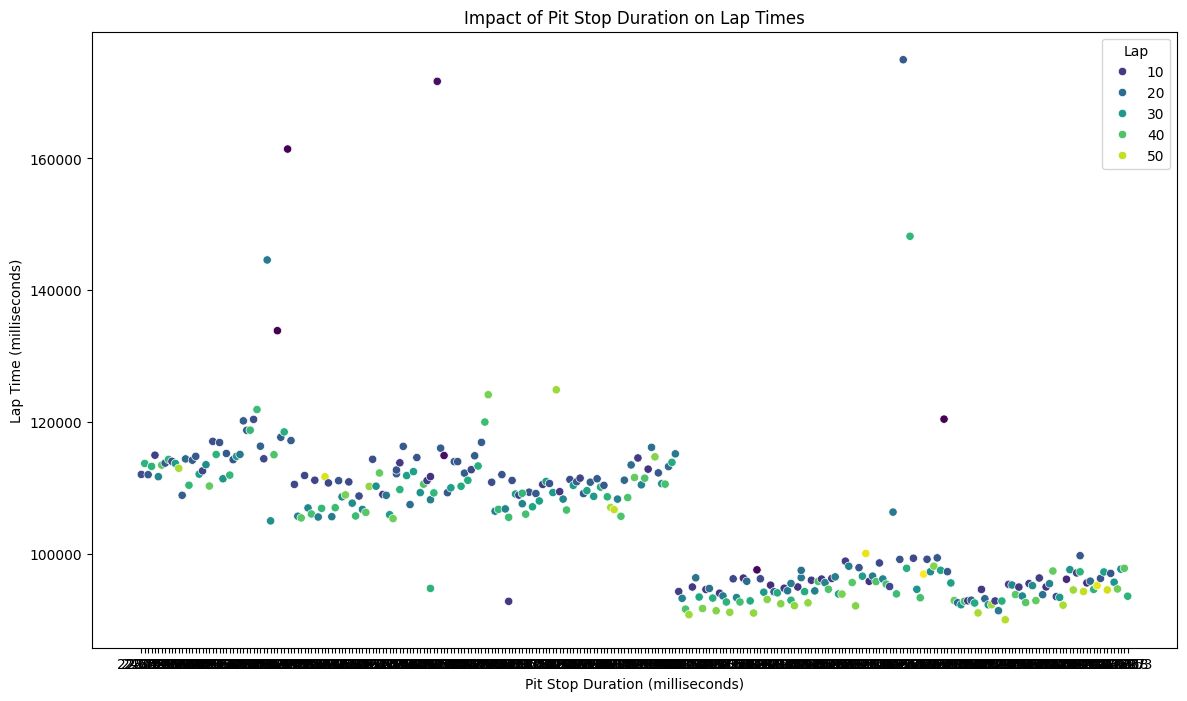

In [ ]:
from pyspark.sql.functions import col

lap_times_aliased = lap_times.alias("lt")
pit_stops_aliased = pit_stops.alias("ps")


pit_lap_times = lap_times_aliased.join(
    pit_stops_aliased,
    (col("lt.raceId") == col("ps.raceId")) & 
    (col("lt.driverId") == col("ps.driverId")) & 
    (col("lt.lap") == col("ps.lap")),
    "inner"
).select(
    col("lt.raceId").alias("raceId"),
    col("lt.driverId").alias("driverId"),
    col("lt.lap").alias("lap"),
    col("lt.milliseconds").alias("lap_time"),
    col("ps.duration").alias("pit_stop_duration")
)


pit_lap_times_pd = pit_lap_times.toPandas().head(300)


plt.figure(figsize=(14, 8))
sns.scatterplot(data=pit_lap_times_pd, x="pit_stop_duration", y="lap_time", hue="lap", palette="viridis")
plt.title("Impact of Pit Stop Duration on Lap Times")
plt.xlabel("Pit Stop Duration (milliseconds)")
plt.ylabel("Lap Time (milliseconds)")
plt.legend(title='Lap')
plt.show()


## **Seasonal Trends and Insights**

> - Comparing performance metrics across different seasons
> - Identifying dominant teams and drivers in each season
> - Analyzing the impact of rule changes on race outcomes and team strategies

### **Compare Performance Metrics Across Different Seasons**

In [ ]:
results_df = spark.read.csv("dataset/results.csv", header=True, inferSchema=True)
races_df = spark.read.csv("dataset/races.csv", header=True, inferSchema=True)
constructors_df = spark.read.csv("dataset/constructors.csv", header=True, inferSchema=True)
drivers_df = spark.read.csv("dataset/drivers.csv", header=True, inferSchema=True)


joined_df = results_df.join(races_df, "raceId") \
                      .join(constructors_df, "constructorId") \
                      .join(drivers_df, "driverId")

In [ ]:
from pyspark.sql.functions import count, sum

# Wins per season
wins_per_season = joined_df.filter(joined_df.positionOrder == 1) \
                           .groupBy("year") \
                           .agg(count("resultId").alias("wins"))

# Points per season
points_per_season = joined_df.groupBy("year").agg(sum("points").alias("total_points"))

# Podiums per season
podiums_per_season = joined_df.filter(joined_df.positionOrder <= 3) \
                              .groupBy("year") \
                              .agg(count("resultId").alias("podiums"))


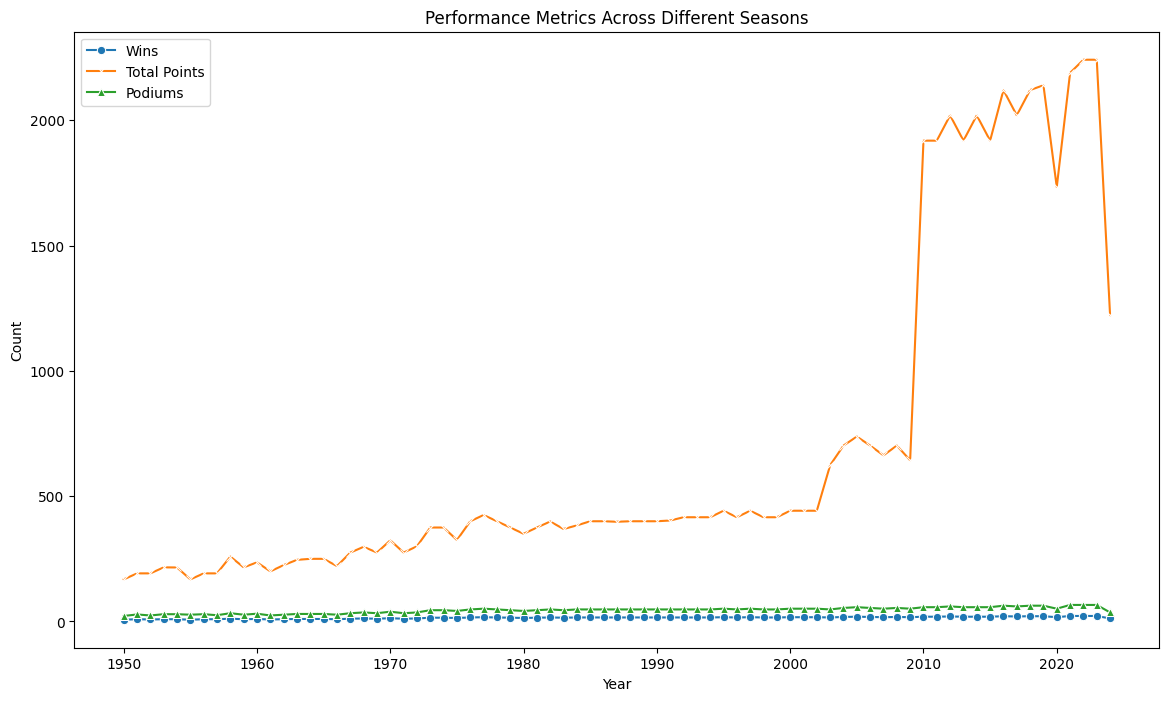

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

wins_per_season_pd = wins_per_season.toPandas()
points_per_season_pd = points_per_season.toPandas()
podiums_per_season_pd = podiums_per_season.toPandas()


plt.figure(figsize=(14, 8))
sns.lineplot(data=wins_per_season_pd, x="year", y="wins", marker='o', label="Wins")
sns.lineplot(data=points_per_season_pd, x="year", y="total_points", marker='x', label="Total Points")
sns.lineplot(data=podiums_per_season_pd, x="year", y="podiums", marker='^', label="Podiums")
plt.title("Performance Metrics Across Different Seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()


### **Identifying Dominant Teams and Drivers in Each Season**

In [ ]:
from pyspark.sql import functions as F

joined_df = results_df.join(constructors_df, results_df.constructorId == constructors_df.constructorId, "inner") \
                       .join(races_df, results_df.raceId == races_df.raceId, "inner") \
                       .join(drivers_df, results_df.driverId == drivers_df.driverId, "inner") \
                       .select(
                           results_df["*"],                
                           constructors_df["name"].alias("team_name"),  
                           races_df["year"],               
                           drivers_df["forename"],         
                           drivers_df["surname"]           
                       )

dominant_teams = joined_df.filter(joined_df.positionOrder == 1) \
                          .groupBy("year", "team_name") \
                          .agg(F.count("resultId").alias("wins")) \
                          .orderBy("year", "wins", ascending=False)

dominant_drivers = joined_df.groupBy("year", "forename", "surname") \
                            .agg(F.sum("points").alias("total_points")) \
                            .orderBy("year", "total_points", ascending=False)


dominant_teams.show()
dominant_drivers.show()

+----+--------------+----+
|year|     team_name|wins|
+----+--------------+----+
|2024|      Red Bull|   7|
|2024|       Ferrari|   2|
|2024|      Mercedes|   2|
|2024|       McLaren|   1|
|2023|      Red Bull|  21|
|2023|       Ferrari|   1|
|2022|      Red Bull|  17|
|2022|       Ferrari|   4|
|2022|      Mercedes|   1|
|2021|      Red Bull|  11|
|2021|      Mercedes|   9|
|2021|       McLaren|   1|
|2021|Alpine F1 Team|   1|
|2020|      Mercedes|  13|
|2020|      Red Bull|   2|
|2020|    AlphaTauri|   1|
|2020|  Racing Point|   1|
|2019|      Mercedes|  15|
|2019|       Ferrari|   3|
|2019|      Red Bull|   3|
+----+--------------+----+
only showing top 20 rows

+----+---------+----------+------------+
|year| forename|   surname|total_points|
+----+---------+----------+------------+
|2024|      Max|Verstappen|       231.0|
|2024|    Lando|    Norris|       162.0|
|2024|  Charles|   Leclerc|       136.0|
|2024|   Carlos|     Sainz|       134.0|
|2024|    Oscar|   Piastri|       112.0

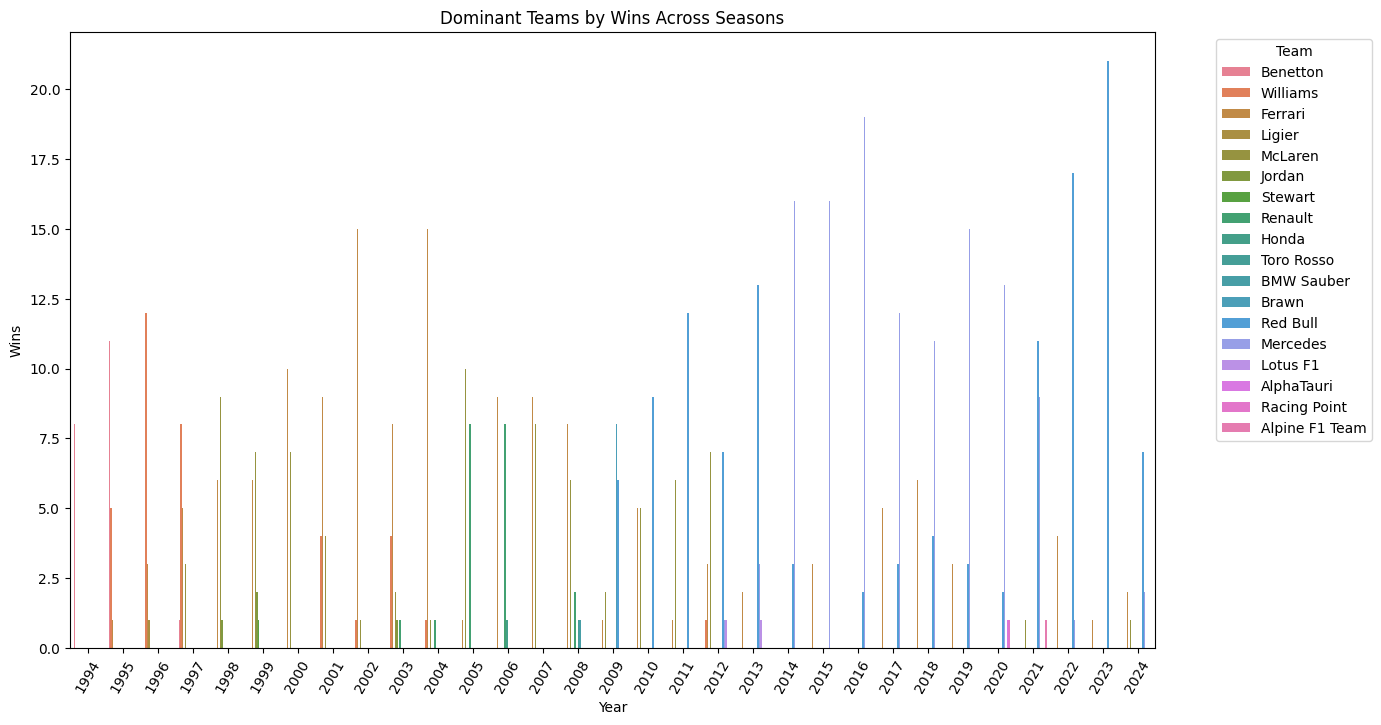

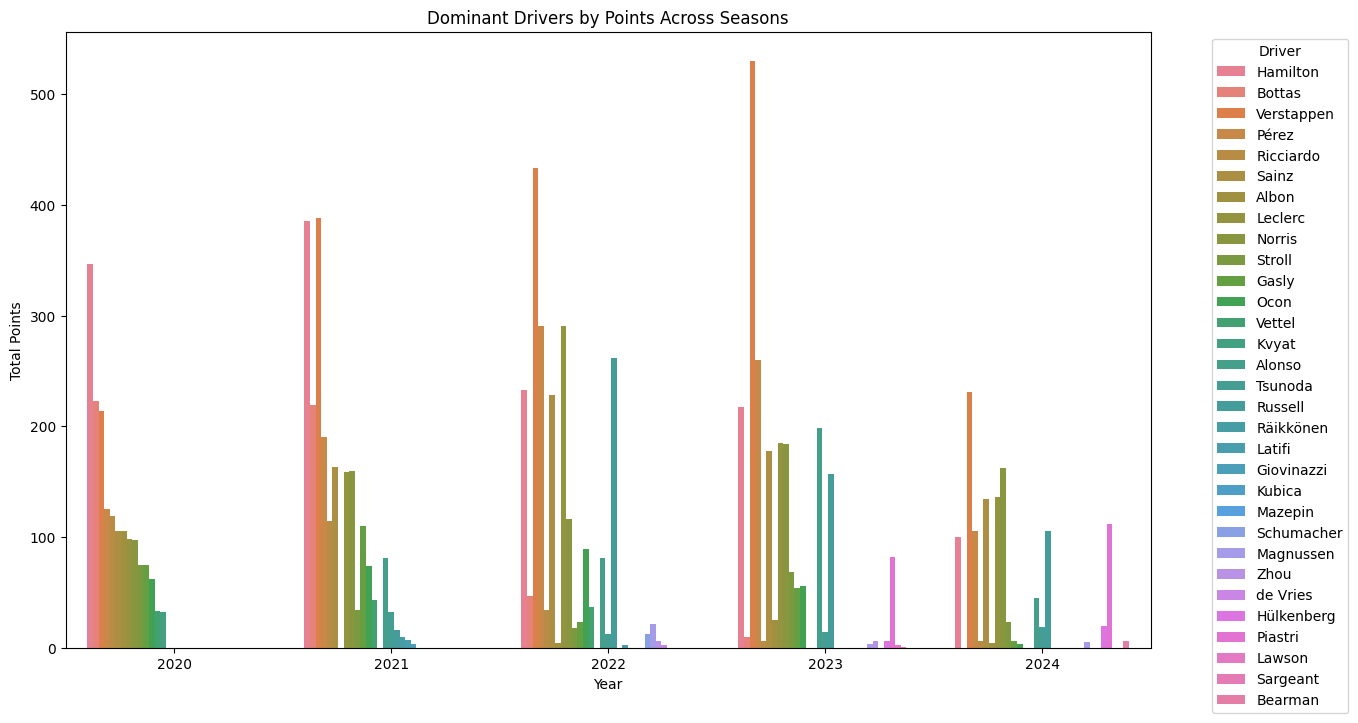

In [ ]:
dominant_teams_pd = dominant_teams.toPandas().head(100)
dominant_drivers_pd = dominant_drivers.toPandas().head(100)


plt.figure(figsize=(14, 8))
sns.barplot(data=dominant_teams_pd, x="year", y="wins", hue="team_name")
plt.title("Dominant Teams by Wins Across Seasons")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.xticks(rotation=60)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(data=dominant_drivers_pd, x="year", y="total_points", hue="surname")
plt.title("Dominant Drivers by Points Across Seasons")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Analyzing the Impact of Rule Changes on Race Outcomes and Team Strategies**

In [ ]:
from pyspark.sql.functions import when, col

rule_changes_df = spark.read.csv("dataset/rule_changes.csv", header=True, inferSchema=True)
joined_df = joined_df.withColumn("wins", when(col("positionOrder") == 1, 1).otherwise(0))
analysis_df = joined_df.join(rule_changes_df, "year")

analysis_df.printSchema()


root
 |-- year: integer (nullable = true)
 |-- resultId: integer (nullable = true)
 |-- raceId: integer (nullable = true)
 |-- driverId: integer (nullable = true)
 |-- constructorId: integer (nullable = true)
 |-- number: string (nullable = true)
 |-- grid: integer (nullable = true)
 |-- position: string (nullable = true)
 |-- positionText: string (nullable = true)
 |-- positionOrder: integer (nullable = true)
 |-- points: double (nullable = true)
 |-- laps: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- milliseconds: string (nullable = true)
 |-- fastestLap: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- fastestLapTime: string (nullable = true)
 |-- fastestLapSpeed: string (nullable = true)
 |-- statusId: integer (nullable = true)
 |-- team_name: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- wins: integer (nullable = false)
 |-- rule_change_type: string (nullable = true)
 |-- descript

In [ ]:
from pyspark.sql.functions import avg, count, sum as F_sum

impact_analysis = analysis_df.groupBy("rule_change_type") \
                             .agg(count("resultId").alias("affected_races"),
                                  avg("points").alias("avg_points_per_race"),
                                  avg("wins").alias("avg_wins_per_race"),
                                  F_sum("points").alias("total_points"),
                                  F_sum("wins").alias("total_wins"))

In [ ]:
impact_analysis_pd = impact_analysis.toPandas()
sns.set(style="whitegrid")

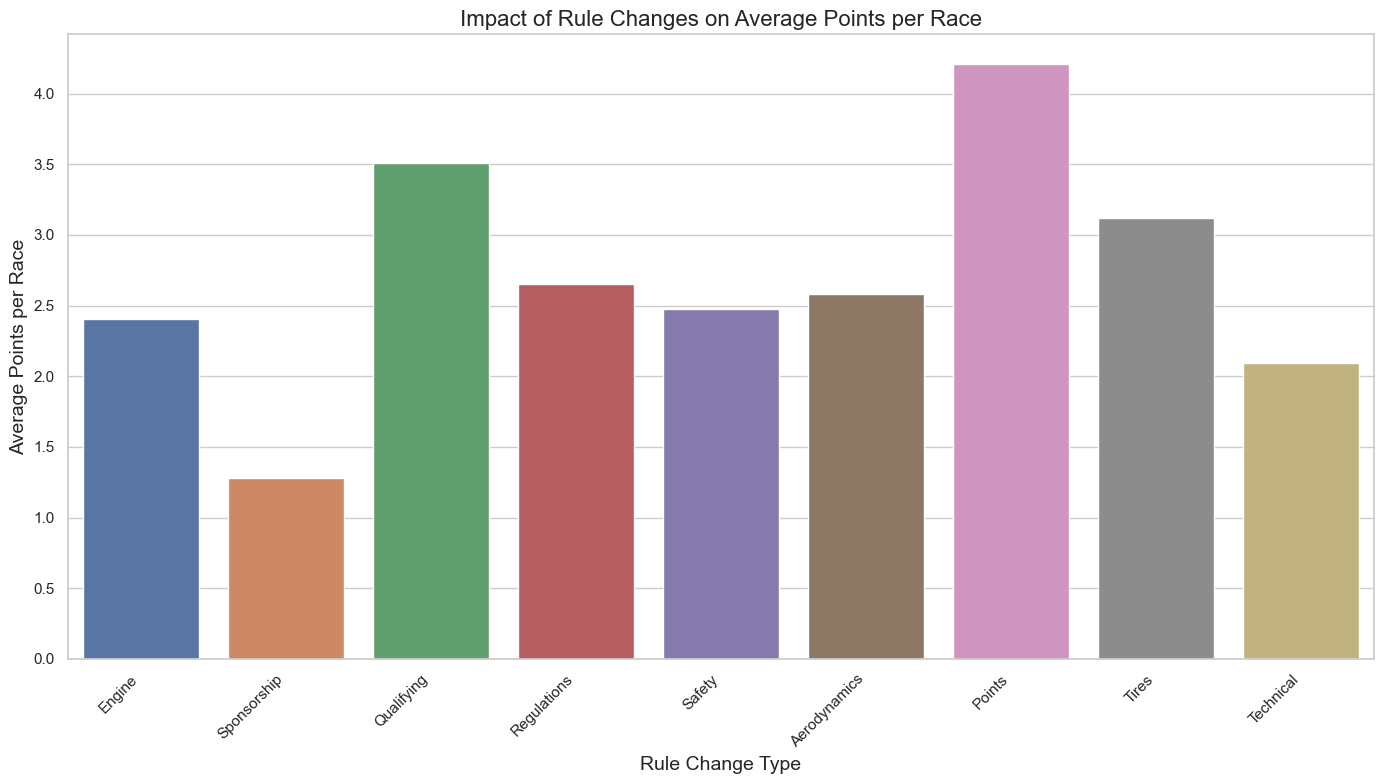

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=impact_analysis_pd, x="rule_change_type", y="avg_points_per_race", hue="rule_change_type")
plt.title("Impact of Rule Changes on Average Points per Race", fontsize=16)
plt.xlabel("Rule Change Type", fontsize=14)
plt.ylabel("Average Points per Race", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

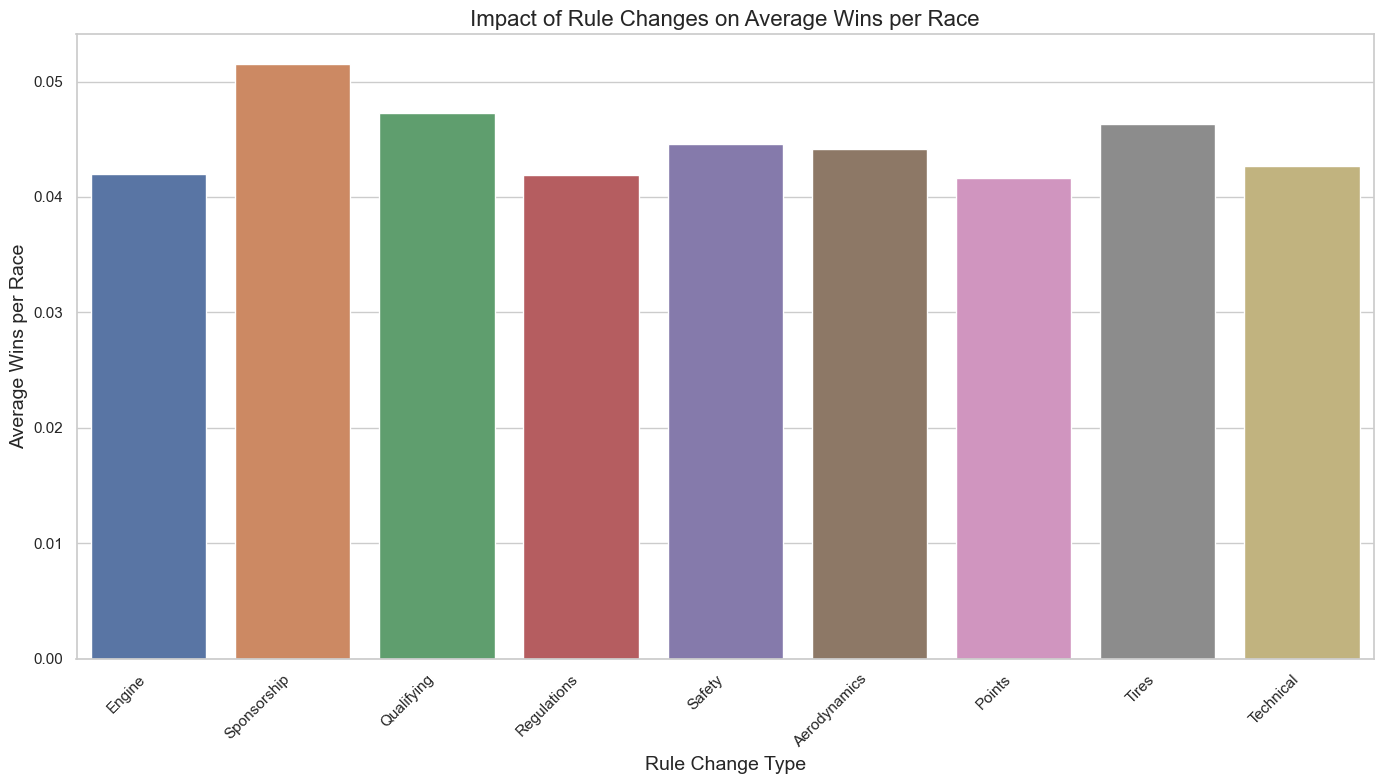

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=impact_analysis_pd, x="rule_change_type", y="avg_wins_per_race", hue="rule_change_type")
plt.title("Impact of Rule Changes on Average Wins per Race", fontsize=16)
plt.xlabel("Rule Change Type", fontsize=14)
plt.ylabel("Average Wins per Race", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

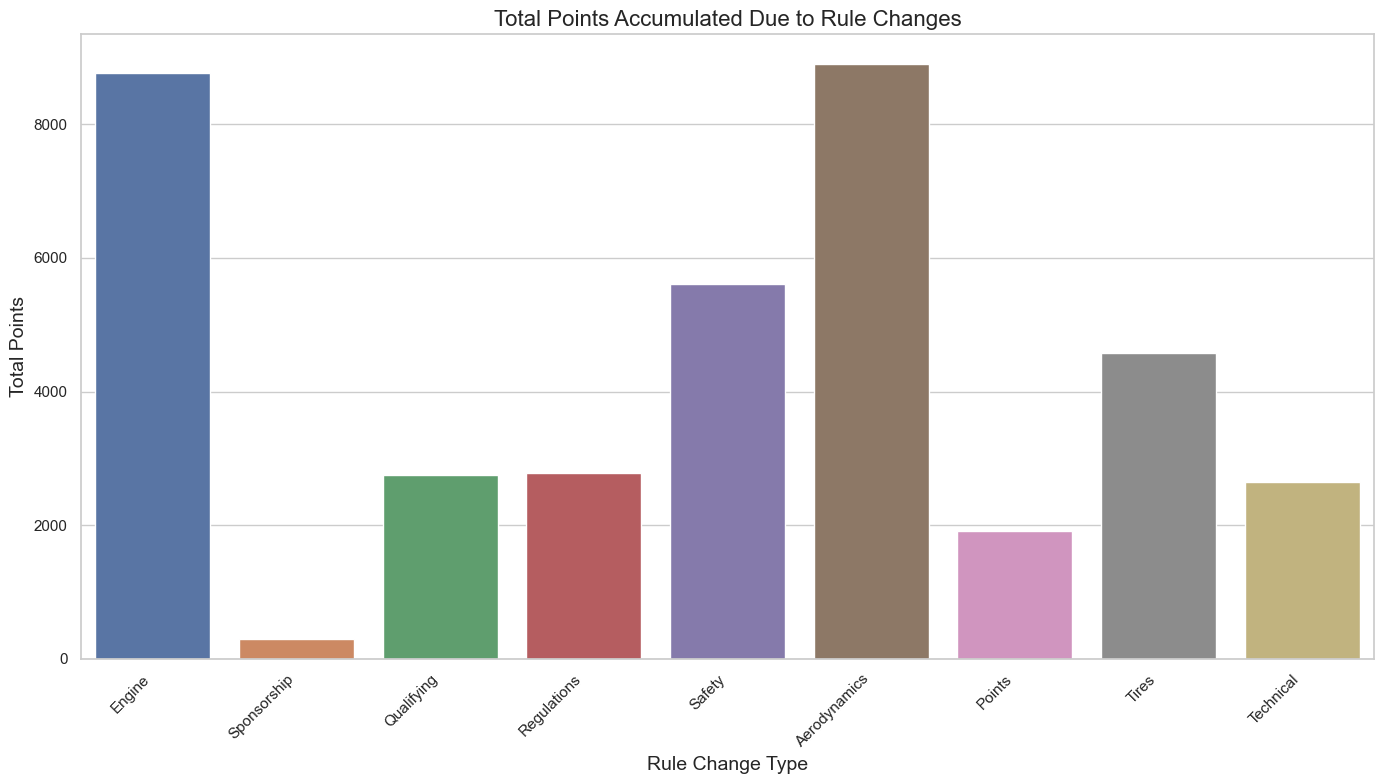

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=impact_analysis_pd, x="rule_change_type", y="total_points", hue="rule_change_type")
plt.title("Total Points Accumulated Due to Rule Changes", fontsize=16)
plt.xlabel("Rule Change Type", fontsize=14)
plt.ylabel("Total Points", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

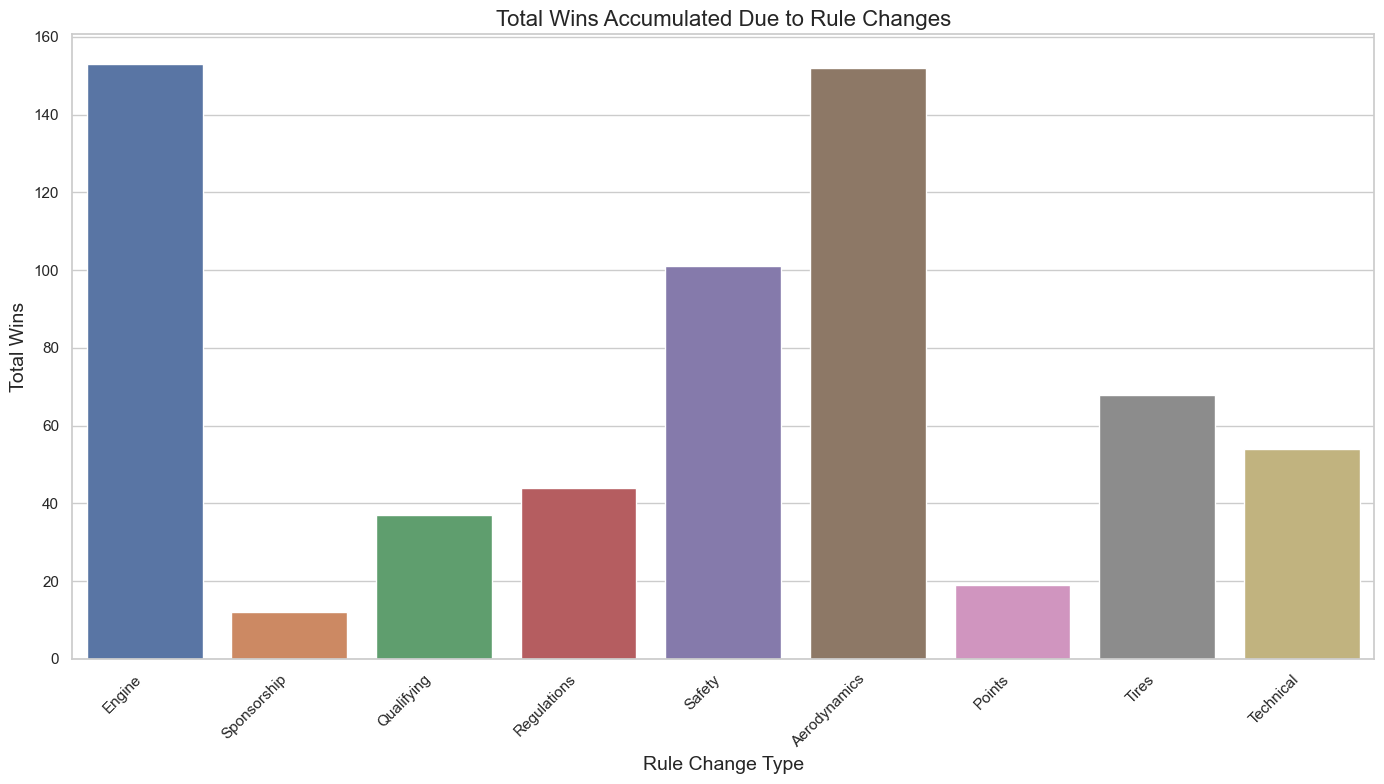

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=impact_analysis_pd, x="rule_change_type", y="total_wins", hue="rule_change_type")
plt.title("Total Wins Accumulated Due to Rule Changes", fontsize=16)
plt.xlabel("Rule Change Type", fontsize=14)
plt.ylabel("Total Wins", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

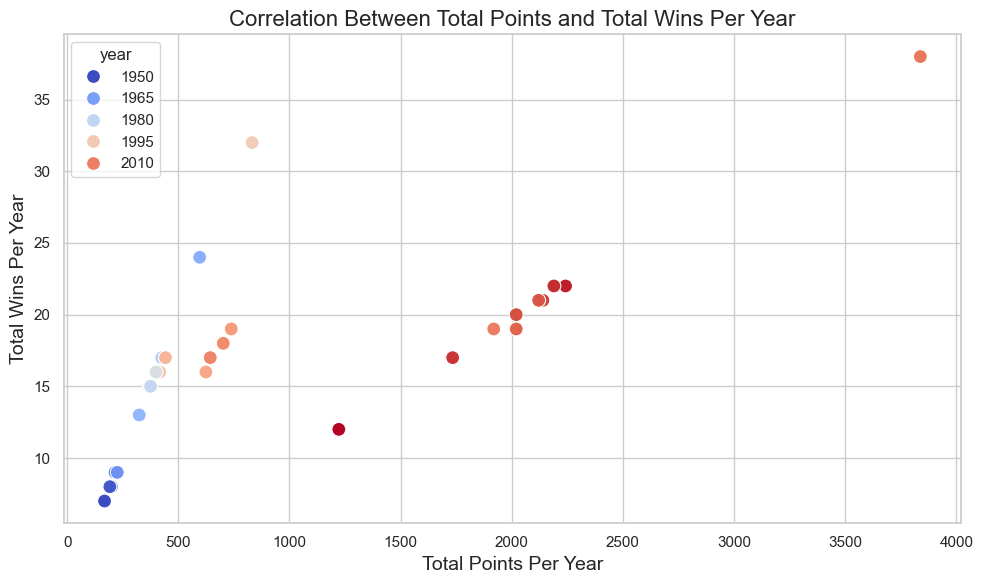

In [ ]:
correlation_analysis = analysis_df.groupBy("year") \
                                  .agg(F_sum("points").alias("total_points_per_year"),
                                       F_sum("wins").alias("total_wins_per_year"))

correlation_analysis_pd = correlation_analysis.toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_analysis_pd, x="total_points_per_year", y="total_wins_per_year", hue="year", palette="coolwarm", s=100)
plt.title("Correlation Between Total Points and Total Wins Per Year", fontsize=16)
plt.xlabel("Total Points Per Year", fontsize=14)
plt.ylabel("Total Wins Per Year", fontsize=14)
plt.tight_layout()
plt.show()

### **Advanced Analysis and Visualization**

In [ ]:
from pyspark.sql.functions import lag
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("surname").orderBy("year")


joined_df = joined_df.withColumn("lag_points", lag("points").over(windowSpec))
joined_df = joined_df.withColumn("points_change", joined_df["points"] - joined_df["lag_points"])


c:\GitHub\Race-Performance-Analysis-and-Prediction-in-Formula-1-World-Championship\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\GitHub\Race-Performance-Analysis-and-Prediction-in-Formula-1-World-Championship\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\GitHub\Race-Performance-Analysis-and-Prediction-in-Formula-1-World-Championship\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\GitHub\Race-Performance-Analysis-and-Prediction-in-Formula-1-World-Championship\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

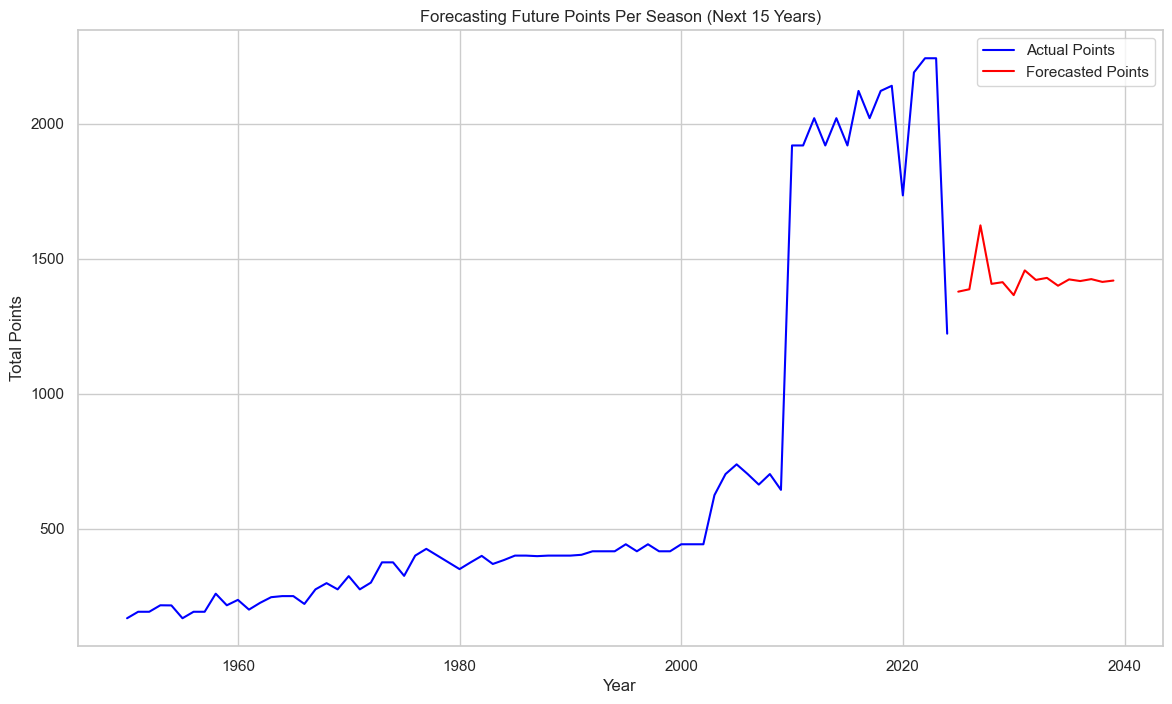

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

points_pd = points_per_season.toPandas()

points_pd = points_pd.sort_values('year')

model = ARIMA(points_pd['total_points'], order=(5, 1, 0))
model_fit = model.fit()


forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

forecast_years = list(range(points_pd['year'].iloc[-1] + 1, points_pd['year'].iloc[-1] + 1 + forecast_steps))
forecast_df = pd.DataFrame({
    'year': forecast_years,
    'forecasted_points': forecast
})


combined_df = pd.concat([points_pd[['year', 'total_points']], forecast_df], ignore_index=True)

plt.figure(figsize=(14, 8))
plt.plot(points_pd['year'], points_pd['total_points'], label='Actual Points', color='blue')
plt.plot(forecast_df['year'], forecast_df['forecasted_points'], label='Forecasted Points', color='red')
plt.title("Forecasting Future Points Per Season (Next 15 Years)")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.legend()
plt.show()

## **Crash and Incident Analysis**

### **Identifying Common Causes and Locations of Crashes**